In [2]:
import pandas as pd

In [3]:
games=pd.read_csv('games.csv')
boxscore=pd.read_csv('boxscore.csv')
salaries=pd.read_csv('salaries.csv')

In [188]:
salaries.head(10)

,playerName,seasonStartYear,salary,inflationAdjSalary
0,Michael Jordan,1996,"$30,140,000","$52,258,566"
1,Horace Grant,1996,"$14,857,000","$25,759,971"
2,Reggie Miller,1996,"$11,250,000","$19,505,934"
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585"
4,Gary Payton,1996,"$10,212,000","$17,706,187"
5,David Robinson,1996,"$9,952,000","$17,255,383"
6,Juwan Howard,1996,"$9,750,000","$16,905,143"
7,Hakeem Olajuwon,1996,"$9,655,000","$16,740,426"
8,Alonzo Mourning,1996,"$9,380,000","$16,263,615"
9,Dennis Rodman,1996,"$9,000,000","$15,604,747"


In [190]:
games.head(10)

,seasonStartYear,awayTeam,pointsAway,homeTeam,pointsHome,attendance,notes,startET,datetime,isRegular,game_id
0,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,1
1,1996,Los Angeles Clippers,97,Golden State Warriors,85,15593.0,NaN,NaN,1996-11-01,1,2
2,1996,Portland Trail Blazers,114,Vancouver Grizzlies,85,19193.0,NaN,NaN,1996-11-01,1,3
3,1996,Seattle SuperSonics,91,Utah Jazz,99,19911.0,NaN,NaN,1996-11-01,1,4
4,1996,New York Knicks,107,Toronto Raptors,99,28457.0,NaN,NaN,1996-11-01,1,5
5,1996,Milwaukee Bucks,111,Philadelphia 76ers,103,20444.0,NaN,NaN,1996-11-01,1,6
6,1996,Washington Bullets,96,Orlando Magic,92,17248.0,NaN,NaN,1996-11-01,1,7
7,1996,Phoenix Suns,82,Los Angeles Lakers,96,17505.0,NaN,NaN,1996-11-01,1,8
8,1996,San Antonio Spurs,78,Minnesota Timberwolves,82,18109.0,NaN,NaN,1996-11-01,1,9
9,1996,Atlanta Hawks,81,Miami Heat,94,15113.0,NaN,NaN,1996-11-01,1,10


In [192]:
boxscore.head(10)

,game_id,teamName,playerName,MP,FG,FGA,3P,3PA,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,isStarter
0,1,Sacramento Kings,Corliss Williamson,37:20,7,11,0,0,0,0,...,3,4,4,1,1,4,5,14,-2,1
1,1,Sacramento Kings,Mitch Richmond,32:00,6,12,1,4,1,1,...,5,5,3,1,2,3,1,14,-12,1
2,1,Sacramento Kings,Olden Polynice,31:34,0,4,0,0,1,4,...,5,7,3,1,0,4,3,1,-12,1
3,1,Sacramento Kings,Mahmoud Abdul-Rauf,29:27,7,13,1,2,2,2,...,2,2,5,1,1,2,2,17,-7,1
4,1,Sacramento Kings,Brian Grant,25:13,3,11,0,0,2,2,...,5,6,0,0,2,1,2,8,-7,1
5,1,Sacramento Kings,Tyus Edney,25:29,4,11,0,2,6,8,...,1,1,0,4,0,4,1,14,-3,0
6,1,Sacramento Kings,Michael Smith,24:45,2,3,0,0,4,4,...,8,10,1,2,0,4,4,8,-10,0
7,1,Sacramento Kings,Lionel Simmons,18:00,2,6,2,4,0,0,...,1,2,1,1,0,4,2,6,-3,0
8,1,Sacramento Kings,Duane Causwell,16:26,1,1,0,0,1,2,...,2,3,1,0,2,1,4,3,+1,0
9,1,Houston Rockets,Clyde Drexler,42:36,8,21,2,5,7,10,...,6,10,9,10,0,7,2,25,+12,1


## Data Cleaning and PreProcessing

In [196]:
games.head(2)

,seasonStartYear,awayTeam,pointsAway,homeTeam,pointsHome,attendance,notes,startET,datetime,isRegular,game_id
0,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,1
1,1996,Los Angeles Clippers,97,Golden State Warriors,85,15593.0,NaN,NaN,1996-11-01,1,2


In [198]:
boxscore.head(2)

,game_id,teamName,playerName,MP,FG,FGA,3P,3PA,FT,FTA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,isStarter
0,1,Sacramento Kings,Corliss Williamson,37:20,7,11,0,0,0,0,...,3,4,4,1,1,4,5,14,-2,1
1,1,Sacramento Kings,Mitch Richmond,32:00,6,12,1,4,1,1,...,5,5,3,1,2,3,1,14,-12,1


In [200]:
#full_data.head()

In [202]:
salaries.head()

,playerName,seasonStartYear,salary,inflationAdjSalary
0,Michael Jordan,1996,"$30,140,000","$52,258,566"
1,Horace Grant,1996,"$14,857,000","$25,759,971"
2,Reggie Miller,1996,"$11,250,000","$19,505,934"
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585"
4,Gary Payton,1996,"$10,212,000","$17,706,187"


In [204]:
player_game_data = pd.merge(boxscore, games, on='game_id', how='inner')


In [206]:
player_game_data.shape

(741569, 31)

In [208]:
full_data = pd.merge(player_game_data, salaries, on=['playerName', 'seasonStartYear'], how='left')


In [210]:
player_game_data.head()

,game_id,teamName,playerName,MP,FG,FGA,3P,3PA,FT,FTA,...,seasonStartYear,awayTeam,pointsAway,homeTeam,pointsHome,attendance,notes,startET,datetime,isRegular
0,1,Sacramento Kings,Corliss Williamson,37:20,7,11,0,0,0,0,...,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1
1,1,Sacramento Kings,Mitch Richmond,32:00,6,12,1,4,1,1,...,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1
2,1,Sacramento Kings,Olden Polynice,31:34,0,4,0,0,1,4,...,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1
3,1,Sacramento Kings,Mahmoud Abdul-Rauf,29:27,7,13,1,2,2,2,...,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1
4,1,Sacramento Kings,Brian Grant,25:13,3,11,0,0,2,2,...,1996,Sacramento Kings,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1


In [212]:
full_data

,game_id,teamName,playerName,MP,FG,FGA,3P,3PA,FT,FTA,...,pointsAway,homeTeam,pointsHome,attendance,notes,startET,datetime,isRegular,salary,inflationAdjSalary
0,1,Sacramento Kings,Corliss Williamson,37:20,7,11,0,0,0,0,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$1,051,000","$1,822,287"
1,1,Sacramento Kings,Mitch Richmond,32:00,6,12,1,4,1,1,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,575,000","$6,198,552"
2,1,Sacramento Kings,Olden Polynice,31:34,0,4,0,0,1,4,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,140,000","$5,444,323"
3,1,Sacramento Kings,Mahmoud Abdul-Rauf,29:27,7,13,1,2,2,2,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,100,000","$5,374,968"
4,1,Sacramento Kings,Brian Grant,25:13,3,11,0,0,2,2,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$1,293,000","$2,241,882"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741631,30250,Miami Heat,Kelly Olynyk,14:52,4,7,1,1,0,0,...,106,Miami Heat,93,NaN,NaN,7:30p,2020-10-11,0,"$12,667,885","$13,437,078"
741632,30250,Miami Heat,Kendrick Nunn,12:45,3,8,2,4,0,0,...,106,Miami Heat,93,NaN,NaN,7:30p,2020-10-11,0,"$1,416,852","$1,502,883"
741633,30250,Miami Heat,Andre Iguodala,10:33,0,2,0,2,0,0,...,106,Miami Heat,93,NaN,NaN,7:30p,2020-10-11,0,"$17,185,185","$18,228,669"
741634,30250,Miami Heat,Solomon Hill,2:29,2,2,1,1,0,0,...,106,Miami Heat,93,NaN,NaN,7:30p,2020-10-11,0,"$13,290,395","$14,097,387"


In [214]:
full_data.isnull().sum()

game_id                    0
teamName                   0
playerName                 0
MP                         0
FG                         0
FGA                        0
3P                         0
3PA                        0
FT                         0
FTA                        0
ORB                        0
DRB                        0
TRB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
+/-                      120
isStarter                  0
seasonStartYear            0
awayTeam                   0
pointsAway                 0
homeTeam                   0
pointsHome                 0
attendance              4375
notes                 739030
startET               109450
datetime                   0
isRegular                  0
salary                 72049
inflationAdjSalary     72049
dtype: int64

In [33]:
salaries.shape

(11583, 4)

In [35]:
full_data.shape

(741636, 33)

In [37]:
salaries.head()

,playerName,seasonStartYear,salary,inflationAdjSalary
0,Michael Jordan,1996,"$30,140,000","$52,258,566"
1,Horace Grant,1996,"$14,857,000","$25,759,971"
2,Reggie Miller,1996,"$11,250,000","$19,505,934"
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585"
4,Gary Payton,1996,"$10,212,000","$17,706,187"


In [39]:
player_game_data.columns

Index(['game_id', 'teamName', 'playerName', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', '+/-', 'isStarter', 'seasonStartYear', 'awayTeam', 'pointsAway',
       'homeTeam', 'pointsHome', 'attendance', 'notes', 'startET', 'datetime',
       'isRegular'],
      dtype='object')

In [41]:
full_data.head(50)

,game_id,teamName,playerName,MP,FG,FGA,3P,3PA,FT,FTA,...,pointsAway,homeTeam,pointsHome,attendance,notes,startET,datetime,isRegular,salary,inflationAdjSalary
0,1,Sacramento Kings,Corliss Williamson,37:20,7,11,0,0,0,0,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$1,051,000","$1,822,287"
1,1,Sacramento Kings,Mitch Richmond,32:00,6,12,1,4,1,1,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,575,000","$6,198,552"
2,1,Sacramento Kings,Olden Polynice,31:34,0,4,0,0,1,4,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,140,000","$5,444,323"
3,1,Sacramento Kings,Mahmoud Abdul-Rauf,29:27,7,13,1,2,2,2,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,100,000","$5,374,968"
4,1,Sacramento Kings,Brian Grant,25:13,3,11,0,0,2,2,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$1,293,000","$2,241,882"
5,1,Sacramento Kings,Tyus Edney,25:29,4,11,0,2,6,8,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$247,500","$429,130"
6,1,Sacramento Kings,Michael Smith,24:45,2,3,0,0,4,4,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$1,570,000","$2,722,161"
7,1,Sacramento Kings,Lionel Simmons,18:00,2,6,2,4,0,0,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$3,194,000","$5,537,951"
8,1,Sacramento Kings,Duane Causwell,16:26,1,1,0,0,1,2,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$2,215,000","$3,840,501"
9,1,Houston Rockets,Clyde Drexler,42:36,8,21,2,5,7,10,...,85,Houston Rockets,96,16285.0,NaN,NaN,1996-11-01,1,"$5,500,000","$9,536,234"


In [216]:
full_data['teamName'].value_counts()

teamName
San Antonio Spurs                    26982
Los Angeles Lakers                   26471
Miami Heat                           26330
Boston Celtics                       25889
Indiana Pacers                       25775
Utah Jazz                            25386
Dallas Mavericks                     25333
Detroit Pistons                      25328
Houston Rockets                      25070
Cleveland Cavaliers                  25032
Portland Trail Blazers               25021
Toronto Raptors                      25019
Golden State Warriors                24943
Milwaukee Bucks                      24755
Philadelphia 76ers                   24722
Atlanta Hawks                        24720
Denver Nuggets                       24679
Orlando Magic                        24649
Chicago Bulls                        24641
Los Angeles Clippers                 24573
Phoenix Suns                         24563
New York Knicks                      24345
Sacramento Kings                     24201
Mi

In [218]:
full_data.isnull().sum()

game_id                    0
teamName                   0
playerName                 0
MP                         0
FG                         0
FGA                        0
3P                         0
3PA                        0
FT                         0
FTA                        0
ORB                        0
DRB                        0
TRB                        0
AST                        0
STL                        0
BLK                        0
TOV                        0
PF                         0
PTS                        0
+/-                      120
isStarter                  0
seasonStartYear            0
awayTeam                   0
pointsAway                 0
homeTeam                   0
pointsHome                 0
attendance              4375
notes                 739030
startET               109450
datetime                   0
isRegular                  0
salary                 72049
inflationAdjSalary     72049
dtype: int64

Starting with data preprocessign

In [221]:
full_data.dtypes

game_id                 int64
teamName               object
playerName             object
MP                     object
FG                     object
FGA                    object
3P                     object
3PA                    object
FT                     object
FTA                    object
ORB                    object
DRB                    object
TRB                    object
AST                    object
STL                    object
BLK                    object
TOV                    object
PF                     object
PTS                    object
+/-                    object
isStarter               int64
seasonStartYear         int64
awayTeam               object
pointsAway              int64
homeTeam               object
pointsHome              int64
attendance            float64
notes                  object
startET                object
datetime               object
isRegular               int64
salary                 object
inflationAdjSalary     object
dtype: obj

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
full_data['FG'].value_counts()

FG
Did Not Play        96910
0                   94136
1                   92535
2                   85800
3                   77158
4                   66496
5                   55292
6                   43729
7                   33385
8                   24863
9                   17392
Did Not Dress       16511
10                  11887
11                   7633
Not With Team        5729
12                   4809
13                   2908
14                   1604
Player Suspended      935
15                    877
16                    494
17                    272
18                    135
19                     78
20                     30
21                     23
22                      6
24                      4
23                      4
28                      1
Name: count, dtype: int64

In [227]:
full_data['FGA'].unique()

array(['11', '12', '4', '13', '3', '6', '1', '21', '8', '2', '5',
       'Player Suspended', '19', '15', '9', '7', 'Did Not Play', '18',
       '10', '0', '14', '16', '20', '17', 'Not With Team', '22',
       'Did Not Dress', '23', '28', '25', '33', '26', '27', '24', '29',
       '32', '35', '30', '37', '40', '31', '34', '39', '36', '38', '47',
       '41', '42', '46', '45', '44', '43', '50'], dtype=object)

In [229]:
full_data['FG'].value_counts()

FG
Did Not Play        96910
0                   94136
1                   92535
2                   85800
3                   77158
4                   66496
5                   55292
6                   43729
7                   33385
8                   24863
9                   17392
Did Not Dress       16511
10                  11887
11                   7633
Not With Team        5729
12                   4809
13                   2908
14                   1604
Player Suspended      935
15                    877
16                    494
17                    272
18                    135
19                     78
20                     30
21                     23
22                      6
24                      4
23                      4
28                      1
Name: count, dtype: int64

In [231]:
full_data['DRB'].value_counts()

DRB
1                   113618
2                   105015
0                   101525
Did Not Play         96910
3                    86163
4                    66063
5                    47782
6                    33640
7                    23021
Did Not Dress        16511
8                    15891
9                    10624
10                    7069
Not With Team         5729
11                    4450
12                    2744
13                    1604
14                    1017
Player Suspended       935
15                     572
16                     331
17                     186
18                     119
19                      62
20                      31
21                       9
22                       7
23                       6
25                       2
Name: count, dtype: int64

In [233]:
full_data['FGA'].value_counts()

FGA
Did Not Play        96910
5                   44434
4                   44383
3                   43582
6                   43416
2                   41998
7                   41101
1                   39597
8                   38504
9                   35650
0                   32846
10                  32071
11                  29099
12                  25310
13                  22636
14                  19373
15                  16961
Did Not Dress       16511
16                  14415
17                  12026
18                   9748
19                   8100
20                   6374
Not With Team        5729
21                   5026
22                   3875
23                   2972
24                   2243
25                   1652
26                   1207
Player Suspended      935
27                    839
28                    624
29                    443
30                    328
31                    220
32                    145
33                    117
34      

In [235]:
special_strings = ['Player Suspended', 'Did Not Play', 'Did Not Dress', 'Not With Team']

for col in ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']:
    full_data[col] = full_data[col].replace(special_strings, '0')
    full_data[col] = pd.to_numeric(full_data[col], errors='coerce')

In [238]:
full_data.dtypes

game_id                 int64
teamName               object
playerName             object
MP                     object
FG                      int64
FGA                     int64
3P                      int64
3PA                     int64
FT                      int64
FTA                     int64
ORB                     int64
DRB                     int64
TRB                     int64
AST                     int64
STL                     int64
BLK                     int64
TOV                     int64
PF                      int64
PTS                     int64
+/-                    object
isStarter               int64
seasonStartYear         int64
awayTeam               object
pointsAway              int64
homeTeam               object
pointsHome              int64
attendance            float64
notes                  object
startET                object
datetime               object
isRegular               int64
salary                 object
inflationAdjSalary     object
dtype: obj

In [242]:
full_data = full_data.drop(['notes', 'startET','attendance', 'datetime', '+/-'], axis=1)


In [244]:
full_data.isnull().sum()


game_id                   0
teamName                  0
playerName                0
MP                        0
FG                        0
FGA                       0
3P                        0
3PA                       0
FT                        0
FTA                       0
ORB                       0
DRB                       0
TRB                       0
AST                       0
STL                       0
BLK                       0
TOV                       0
PF                        0
PTS                       0
isStarter                 0
seasonStartYear           0
awayTeam                  0
pointsAway                0
homeTeam                  0
pointsHome                0
isRegular                 0
salary                72049
inflationAdjSalary    72049
dtype: int64

In [246]:
full_data['MP']


0         37:20
1         32:00
2         31:34
3         29:27
4         25:13
          ...  
741631    14:52
741632    12:45
741633    10:33
741634     2:29
741635     1:27
Name: MP, Length: 741636, dtype: object

In [248]:
full_data[['MP_mins', 'MP_secs']] = full_data['MP'].str.split(':', expand=True)
full_data['MP_mins'] = pd.to_numeric(full_data['MP_mins'], errors='coerce').fillna(0)
full_data['MP_secs'] = pd.to_numeric(full_data['MP_secs'], errors='coerce').fillna(0)


In [250]:
full_data = full_data.drop(['MP'], axis=1)

In [252]:
full_data.dtypes


game_id                 int64
teamName               object
playerName             object
FG                      int64
FGA                     int64
3P                      int64
3PA                     int64
FT                      int64
FTA                     int64
ORB                     int64
DRB                     int64
TRB                     int64
AST                     int64
STL                     int64
BLK                     int64
TOV                     int64
PF                      int64
PTS                     int64
isStarter               int64
seasonStartYear         int64
awayTeam               object
pointsAway              int64
homeTeam               object
pointsHome              int64
isRegular               int64
salary                 object
inflationAdjSalary     object
MP_mins               float64
MP_secs               float64
dtype: object

In [254]:
full_data['salary']

0          $1,051,000
1          $3,575,000
2          $3,140,000
3          $3,100,000
4          $1,293,000
             ...     
741631    $12,667,885
741632     $1,416,852
741633    $17,185,185
741634    $13,290,395
741635            NaN
Name: salary, Length: 741636, dtype: object

In [256]:
full_data['salary'] = full_data['salary'].str.replace('[\$,]', '', regex=True).astype(float)
full_data['inflationAdjSalary'] = full_data['inflationAdjSalary'].str.replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/71/w789lff56sb1x_gvq1sxgw7h0000gn/T/ipykernel_38726/3215341255.py:1: SyntaxWarning: invalid escape sequence '\$'
  full_data['salary'] = full_data['salary'].str.replace('[\$,]', '', regex=True).astype(float)
/var/folders/71/w789lff56sb1x_gvq1sxgw7h0000gn/T/ipykernel_38726/3215341255.py:2: SyntaxWarning: invalid escape sequence '\$'
  full_data['inflationAdjSalary'] = full_data['inflationAdjSalary'].str.replace('[\$,]', '', regex=True).astype(float)


In [258]:
full_data = full_data.rename(columns={
    'salary': 'salary($)',
    'inflationAdjSalary': 'inflationAdjSalary($)'
})

In [262]:
full_data['salary($)']

0          1051000.0
1          3575000.0
2          3140000.0
3          3100000.0
4          1293000.0
             ...    
741631    12667885.0
741632     1416852.0
741633    17185185.0
741634    13290395.0
741635           NaN
Name: salary($), Length: 741636, dtype: float64

In [264]:
full_data['isRegular'].value_counts()

isRegular
1    693807
0     47829
Name: count, dtype: int64

In [266]:
full_data.isnull().sum()

game_id                      0
teamName                     0
playerName                   0
FG                           0
FGA                          0
3P                           0
3PA                          0
FT                           0
FTA                          0
ORB                          0
DRB                          0
TRB                          0
AST                          0
STL                          0
BLK                          0
TOV                          0
PF                           0
PTS                          0
isStarter                    0
seasonStartYear              0
awayTeam                     0
pointsAway                   0
homeTeam                     0
pointsHome                   0
isRegular                    0
salary($)                72049
inflationAdjSalary($)    72049
MP_mins                      0
MP_secs                      0
dtype: int64

In [268]:
full_data['salary($)'] = full_data.groupby(['playerName', 'seasonStartYear'])['salary($)'].transform(lambda x: x.ffill().bfill())
full_data['salary($)'] = full_data['salary($)'].fillna(0)

full_data['inflationAdjSalary($)'] = full_data.groupby(['playerName', 'seasonStartYear'])['inflationAdjSalary($)'].transform(lambda x: x.ffill().bfill())
full_data['inflationAdjSalary($)'] = full_data['inflationAdjSalary($)'].fillna(0)


In [270]:
full_data.isnull().sum()

game_id                  0
teamName                 0
playerName               0
FG                       0
FGA                      0
3P                       0
3PA                      0
FT                       0
FTA                      0
ORB                      0
DRB                      0
TRB                      0
AST                      0
STL                      0
BLK                      0
TOV                      0
PF                       0
PTS                      0
isStarter                0
seasonStartYear          0
awayTeam                 0
pointsAway               0
homeTeam                 0
pointsHome               0
isRegular                0
salary($)                0
inflationAdjSalary($)    0
MP_mins                  0
MP_secs                  0
dtype: int64

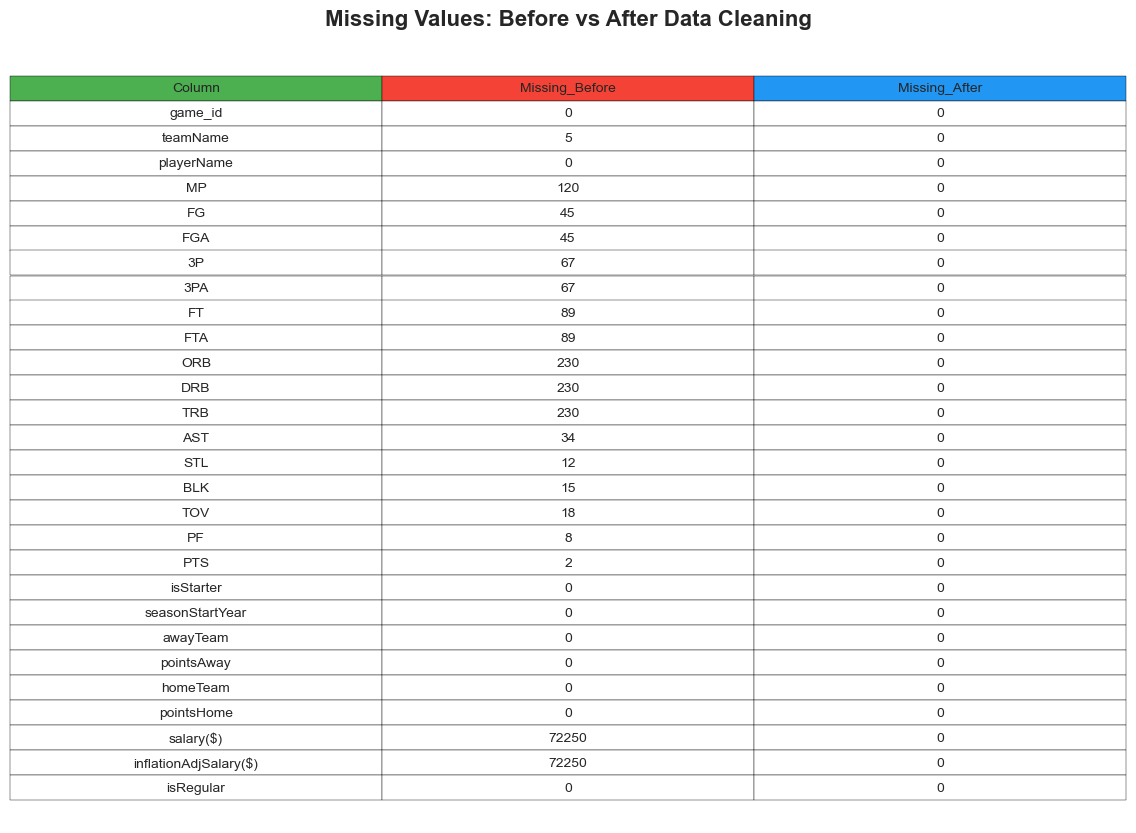

In [417]:
import pandas as pd
import matplotlib.pyplot as plt

before_cleaning = {
   'Column': ['game_id', 'teamName', 'playerName', 'MP', 'FG', 'FGA', '3P', '3PA', 
              'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 
              'PF', 'PTS', 'isStarter', 'seasonStartYear', 'awayTeam', 'pointsAway', 
              'homeTeam', 'pointsHome', 'salary($)', 'inflationAdjSalary($)', 'isRegular'],
   'Missing_Before': [0, 5, 0, 120, 45, 45, 67, 67, 89, 89, 230, 230, 230, 34, 12, 15, 
                      18, 8, 2, 0, 0, 0, 0, 0, 0, 72250, 72250, 0],  # Example values
   'Missing_After': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # After cleaning
}

comparison_df = pd.DataFrame(before_cleaning)

fig, ax = plt.subplots(figsize=(12, 10))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=comparison_df.values,
               colLabels=comparison_df.columns,
               cellLoc='center',
               loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

table[(0, 0)].set_facecolor('#4CAF50')
table[(0, 1)].set_facecolor('#f44336') 
table[(0, 2)].set_facecolor('#2196F3')

plt.title('Missing Values: Before vs After Data Cleaning', fontsize=16, fontweight='bold', pad=20)
plt.savefig("missingvalues.png", dpi=300) 

plt.show()
plt.close()


## Feature Engineering and Exploratory data analysis


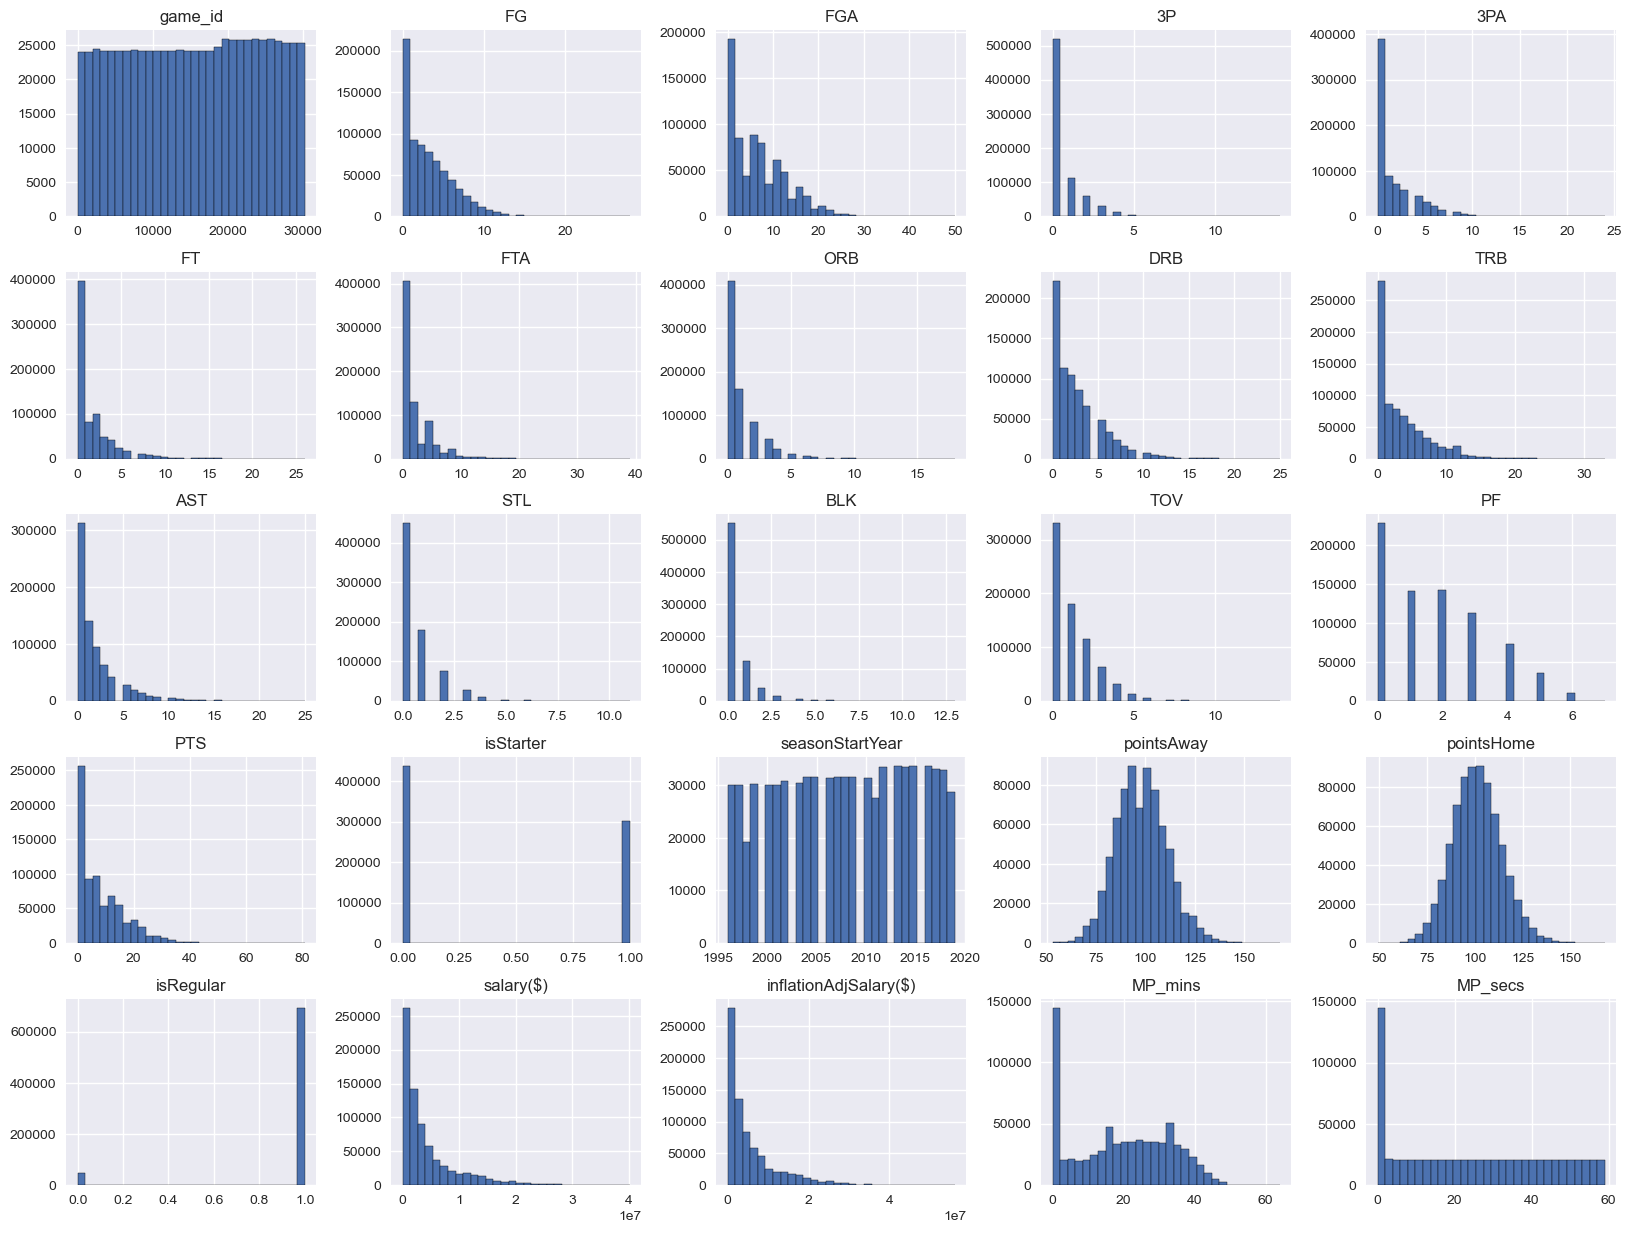

In [311]:
full_data.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.savefig("columnshisto.png", dpi=300) 
plt.show()
plt.close()

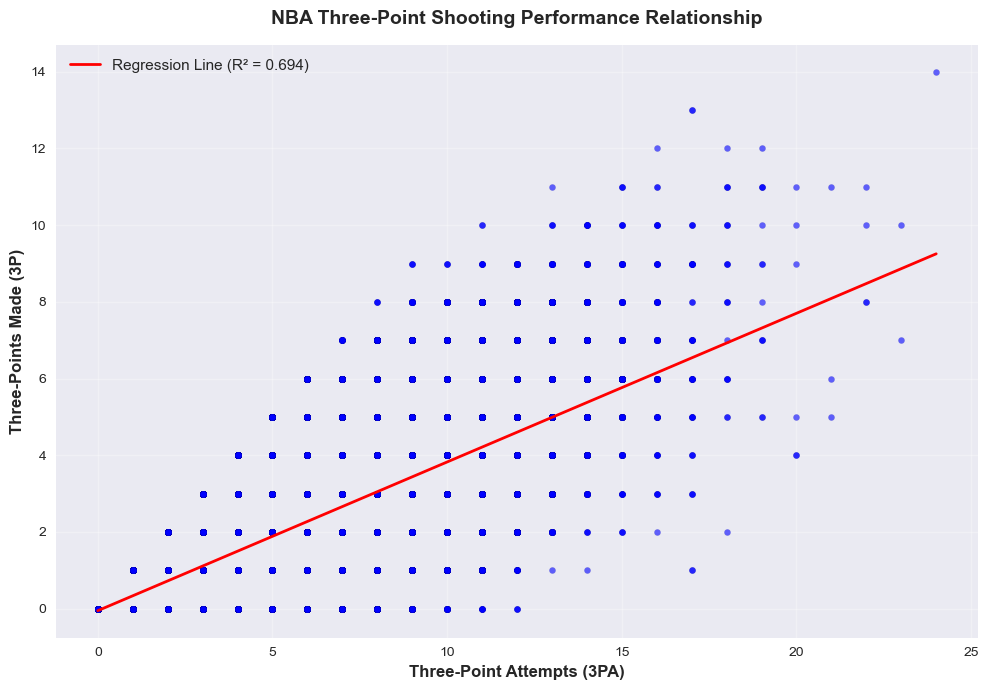

In [315]:
from scipy import stats


plt.figure(figsize=(10,7), facecolor='white')
plt.scatter(full_data['3PA'], full_data['3P'], alpha=0.6, color='blue', s=20, edgecolors='navy', linewidth=0.1)
slope, intercept, r_value, p_value, std_err = stats.linregress(full_data['3PA'].dropna(), full_data['3P'].dropna())
line_x = np.linspace(full_data['3PA'].min(), full_data['3PA'].max(), 100)
line_y = slope * line_x + intercept
plt.plot(line_x, line_y, 'red', linewidth=2, label=f'Regression Line (R² = {r_value**2:.3f})')

plt.title('NBA Three-Point Shooting Performance Relationship', 
         fontweight='bold', fontsize=14, pad=15)
plt.xlabel('Three-Point Attempts (3PA)', fontsize=12, fontweight='bold')
plt.ylabel('Three-Points Made (3P)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
total_observations = len(full_data.dropna(subset=['3PA', '3P']))

plt.tight_layout()
plt.savefig("3P_vs_3PAA.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

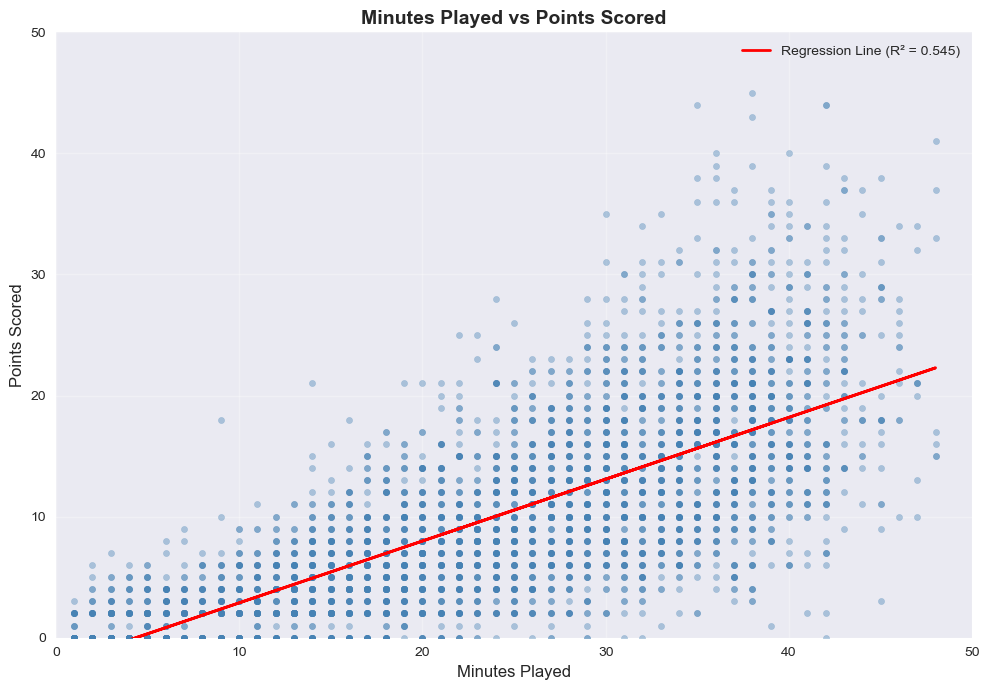

In [317]:
plt.figure(figsize=(10,7))
full_data['MP_mins'] = pd.to_numeric(full_data['MP_mins'], errors='coerce')
full_data['PTS'] = pd.to_numeric(full_data['PTS'], errors='coerce')

sample = full_data.sample(5000)
sample = sample.dropna(subset=['MP_mins', 'PTS'])
sample = sample[(sample['MP_mins'] > 0) & (sample['MP_mins'] <= 48) & (sample['PTS'] <= 60)]
plt.scatter(sample['MP_mins'], sample['PTS'], alpha=0.4, s=20, color='steelblue')

slope, intercept, r_value, p_value, std_err = stats.linregress(sample['MP_mins'], sample['PTS'])
line = slope * sample['MP_mins'] + intercept
plt.plot(sample['MP_mins'], line, 'r-', linewidth=2, label=f'Regression Line (R² = {r_value**2:.3f})')
plt.title('Minutes Played vs Points Scored', fontsize=14, fontweight='bold')
plt.xlabel('Minutes Played', fontsize=12)
plt.ylabel('Points Scored', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 50)
plt.ylim(0, 50)

plt.tight_layout()
plt.savefig("Minutes_vs_points.png", dpi=300)  
plt.show()
plt.close()


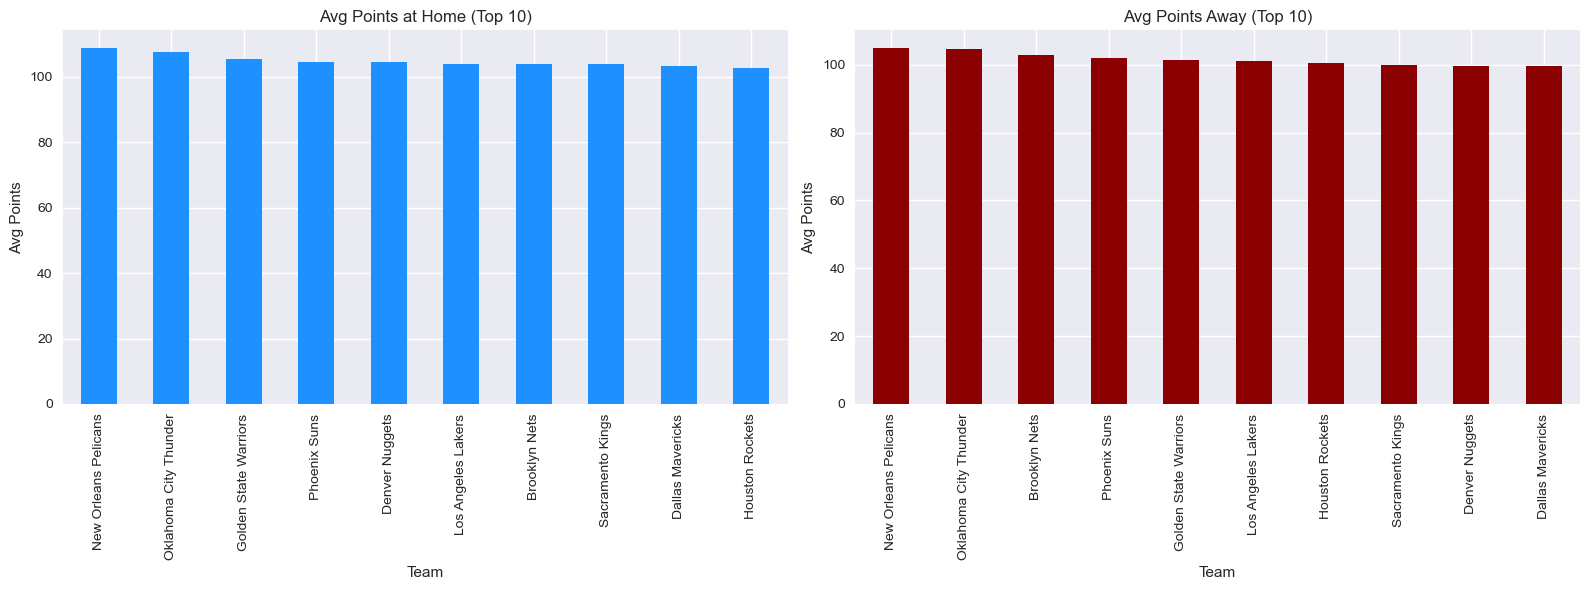

In [319]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

home_pts = full_data[full_data['isRegular'] == 1].groupby('homeTeam')['pointsHome'].mean().sort_values(ascending=False).head(10)
home_pts.plot(kind='bar', ax=axes[0], color='dodgerblue')
axes[0].set_title('Avg Points at Home (Top 10)')
axes[0].set_ylabel('Avg Points')
axes[0].set_xlabel('Team')

away_pts = full_data[full_data['isRegular'] == 1].groupby('awayTeam')['pointsAway'].mean().sort_values(ascending=False).head(10)
away_pts.plot(kind='bar', ax=axes[1], color='darkred')
axes[1].set_title('Avg Points Away (Top 10)')
axes[1].set_ylabel('Avg Points')
axes[1].set_xlabel('Team')

plt.tight_layout()
plt.savefig("homevsaway.png", dpi=300)  
plt.show()
plt.close()


In [321]:
def clutch_analysis(df):
    df['game_margin'] = abs(df['pointsHome'] - df['pointsAway'])
    df['is_clutch'] = df['game_margin'] <= 5
    
    clutch_stats = df.groupby(['playerName', 'is_clutch']).agg({
        'PTS': 'mean',
        'FG': 'sum',
        'FGA': 'sum',
        'game_id': 'count'
    }).reset_index()
    
    clutch_pivot = clutch_stats.pivot(index='playerName', columns='is_clutch', values='PTS')
    clutch_pivot.columns = ['Regular', 'Clutch']
    clutch_pivot = clutch_pivot.dropna()
    clutch_pivot['Clutch_Boost'] = clutch_pivot['Clutch'] - clutch_pivot['Regular']
    
    print("TOP 10 CLUTCH PERFORMERS (PPG boost in close games):")
    print(clutch_pivot.nlargest(10, 'Clutch_Boost')[['Regular', 'Clutch', 'Clutch_Boost']].round(2))
    return clutch_pivot
clutch_analysis(full_data)


TOP 10 CLUTCH PERFORMERS (PPG boost in close games):
                  Regular  Clutch  Clutch_Boost
playerName                                     
Mychal Mulder        9.83   18.00          8.17
Dino Radja           8.96   15.89          6.93
Mychel Thompson      0.00    6.00          6.00
Ja Morant           16.15   21.88          5.73
Jamel Artis          3.93    9.00          5.07
Jemerrio Jones       2.00    7.00          5.00
Trae Young          21.80   26.74          4.93
Myke Henry           3.76    8.60          4.84
Wayman Tisdale       3.90    8.16          4.25
Cameron Reynolds     3.35    7.60          4.25


,Regular,Clutch,Clutch_Boost
playerName,,,
A.C. Green,5.762376,5.588235,-0.174141
A.J. Bramlett,0.666667,0.000000,-0.666667
A.J. Guyton,4.455696,3.333333,-1.122363
A.J. Hammons,1.216216,0.333333,-0.882883
A.J. Price,4.164875,3.894231,-0.270644
...,...,...,...
Šarūnas Jasikevičius,5.531746,4.703704,-0.828042
Šarūnas Marčiulionis,3.625000,6.444444,2.819444
Žan Tabak,2.839506,2.525641,-0.313865


/var/folders/71/w789lff56sb1x_gvq1sxgw7h0000gn/T/ipykernel_38726/811092290.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_points['PTS'], y=avg_points.index, palette='viridis')


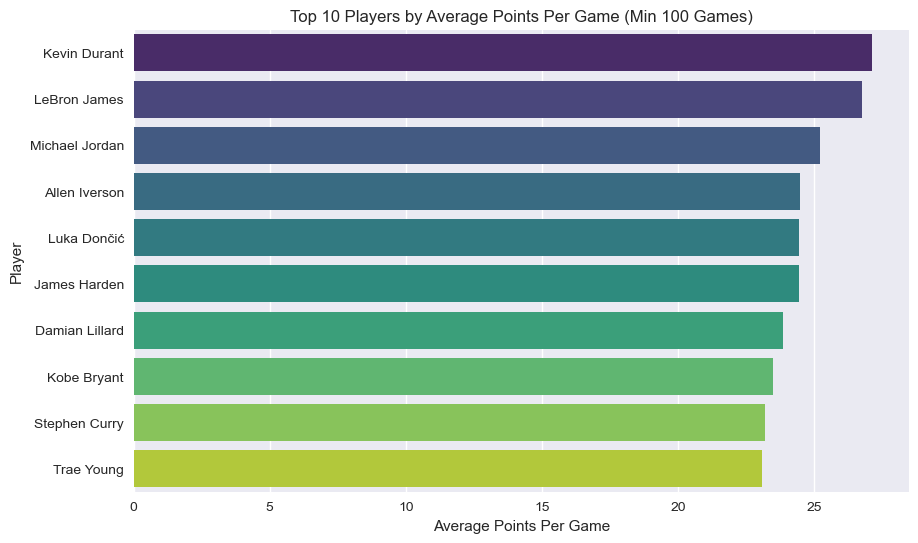

In [325]:
MLNBA=full_data.copy()
min_games = 100  
avg_points = (
    MLNBA.groupby('playerName')
    .agg({'PTS': 'mean', 'game_id': 'count'})
    .query('game_id >= @min_games')
    .sort_values('PTS', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_points['PTS'], y=avg_points.index, palette='viridis')
plt.title('Top 10 Players by Average Points Per Game (Min 100 Games)')
plt.xlabel('Average Points Per Game')
plt.ylabel('Player')
plt.show()


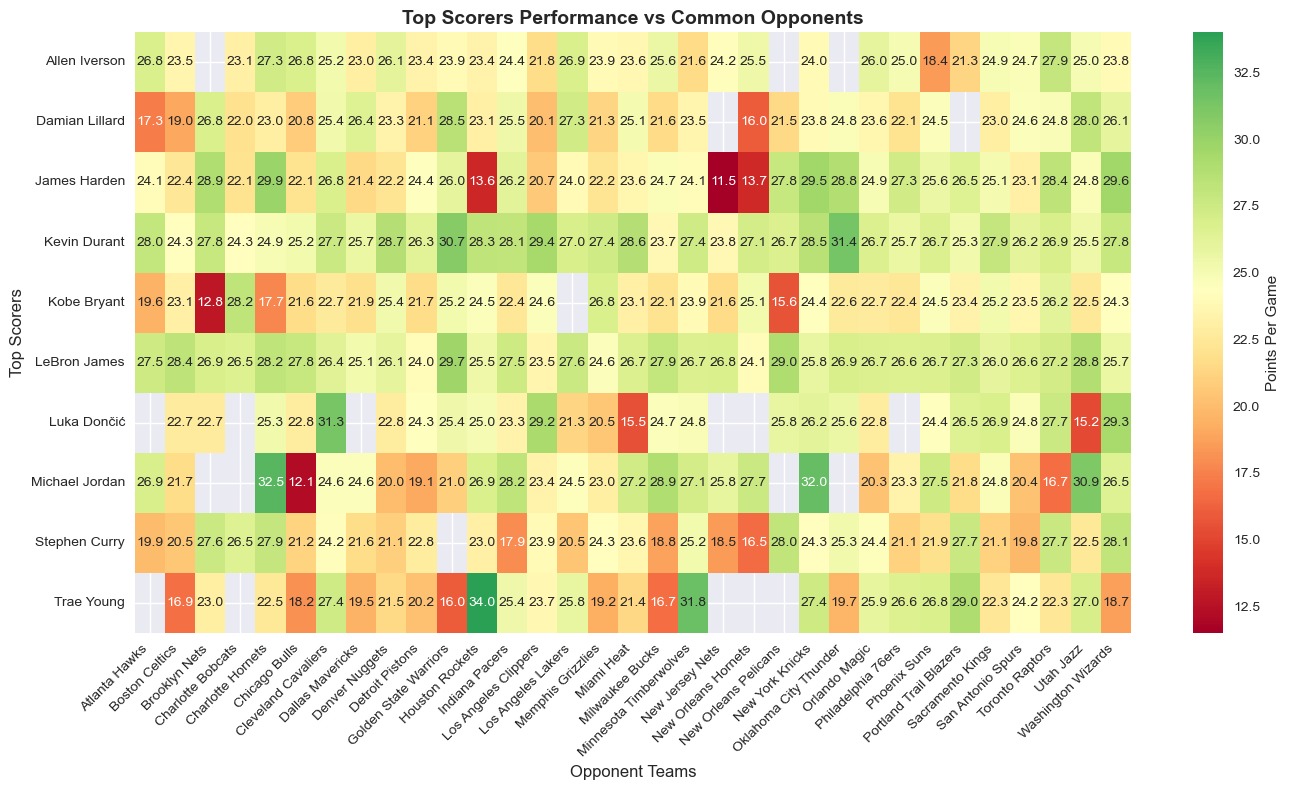

In [327]:

top_scorers = full_data.groupby('playerName')['PTS'].mean().nlargest(10).index

full_data['opponent'] = np.where(full_data['teamName'] == full_data['homeTeam'], 
                                full_data['awayTeam'], full_data['homeTeam'])

rivalry_data = (full_data[full_data['playerName'].isin(top_scorers)]
                .groupby(['playerName', 'opponent'])
                .agg({'PTS': ['mean', 'count']})
                .reset_index())

rivalry_data.columns = ['playerName', 'opponent', 'avg_pts', 'games_count']
rivalry_data = rivalry_data[rivalry_data['games_count'] >= 3]  # At least 3 games
rivalry_pivot = rivalry_data.pivot(index='playerName', columns='opponent', values='avg_pts')

opponent_coverage = rivalry_pivot.count()
common_opponents = opponent_coverage[opponent_coverage >= 7].index
rivalry_pivot_filtered = rivalry_pivot[common_opponents]

plt.figure(figsize=(14, 8))
sns.heatmap(rivalry_pivot_filtered, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlGn', 
            center=rivalry_pivot_filtered.mean().mean(),
            square=False,
            cbar_kws={'label': 'Points Per Game'})

plt.title('Top Scorers Performance vs Common Opponents', 
          fontsize=14, fontweight='bold')
plt.xlabel('Opponent Teams', fontsize=12)
plt.ylabel('Top Scorers', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("topscorersvsoppnonets.png", dpi=300) 

plt.show()
plt.close()

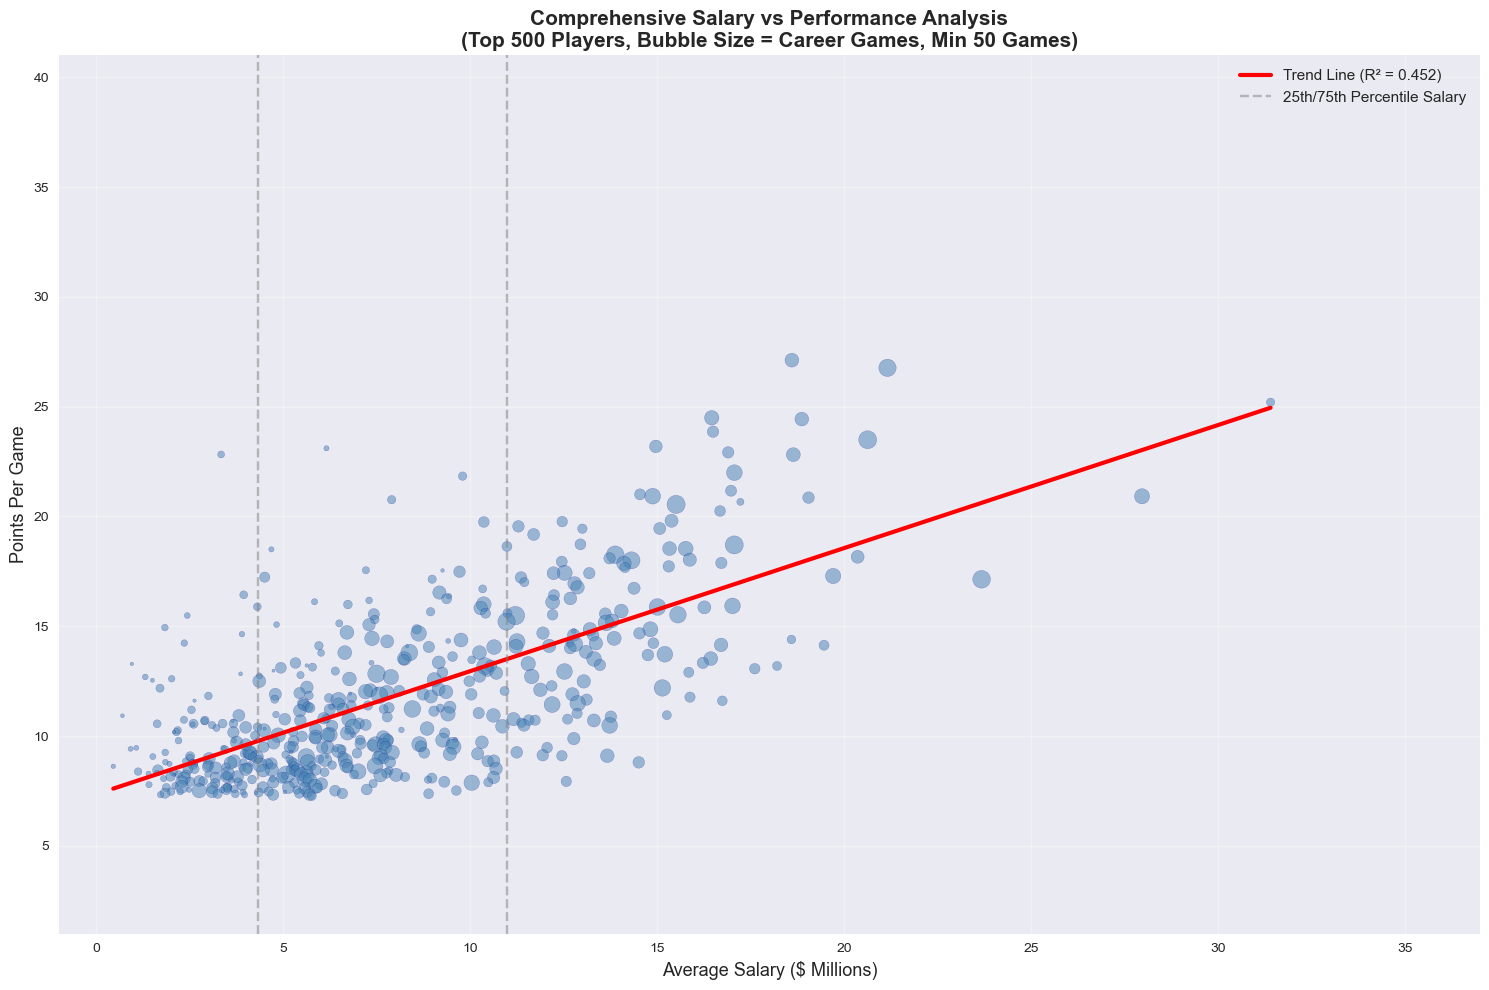

In [329]:

full_data_salary = full_data.dropna(subset=['inflationAdjSalary($)'])
full_data_salary = full_data_salary[full_data_salary['inflationAdjSalary($)'] > 0]  

player_stats = full_data_salary.groupby('playerName').agg({
    'PTS': 'mean',
    'inflationAdjSalary($)': 'mean',
    'game_id': 'count'
}).query('game_id >= 50')  

filtered_stats = player_stats[
    (player_stats['PTS'] >= 2) &  
    (player_stats['PTS'] <= 40) & 
    (player_stats['inflationAdjSalary($)'] <= 35000000) &  
    (player_stats['inflationAdjSalary($)'] >= 100000) 
]

top_players = filtered_stats.nlargest(500, 'PTS')
plt.figure(figsize=(15, 10))
plt.scatter(top_players['inflationAdjSalary($)']/1000000,  
           top_players['PTS'], 
           s=top_players['game_id']/10,  
           alpha=0.5,  
           c='steelblue',
           edgecolors='darkblue',
           linewidth=0.2)

slope, intercept, r_value, p_value, std_err = stats.linregress(
    top_players['inflationAdjSalary($)'], top_players['PTS'])

x_line = np.linspace(top_players['inflationAdjSalary($)'].min(), 
                     top_players['inflationAdjSalary($)'].max(), 100)
y_line = slope * x_line + intercept

plt.plot(x_line/1000000, y_line, 'red', linewidth=3, 
         label=f'Trend Line (R² = {r_value**2:.3f})')

q25_salary = top_players['inflationAdjSalary($)'].quantile(0.25)
q75_salary = top_players['inflationAdjSalary($)'].quantile(0.75)
plt.axvline(q25_salary/1000000, color='gray', linestyle='--', alpha=0.5, label='25th/75th Percentile Salary')
plt.axvline(q75_salary/1000000, color='gray', linestyle='--', alpha=0.5)

plt.xlabel('Average Salary ($ Millions)', fontsize=13)
plt.ylabel('Points Per Game', fontsize=13)
plt.title('Comprehensive Salary vs Performance Analysis\n(Top 500 Players, Bubble Size = Career Games, Min 50 Games)', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

plt.xlim(-1, 37)
plt.ylim(1, 41)

plt.tight_layout()
plt.savefig("compensationvsplay.png", dpi=300)  

plt.show()
plt.close()


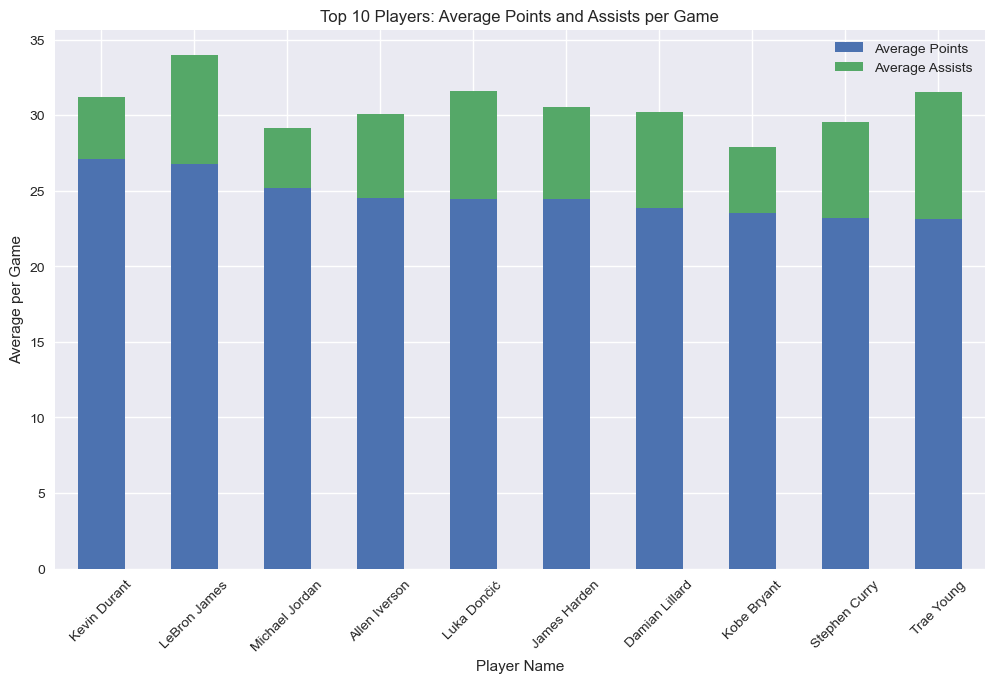

In [331]:
avg_stats = full_data.groupby('playerName')[['PTS', 'AST']].mean()

top_10_players_avg = avg_stats['PTS'].sort_values(ascending=False).head(10).index

top_avg_stats = avg_stats.loc[top_10_players_avg]

top_avg_stats.plot(kind='bar', stacked=True, figsize=(12,7))

plt.title('Top 10 Players: Average Points and Assists per Game')
plt.ylabel('Average per Game')
plt.xlabel('Player Name')
plt.xticks(rotation=45)
plt.legend(['Average Points', 'Average Assists'])
plt.savefig("avgpointsandassists.png", dpi=300)  

plt.show()
plt.close()

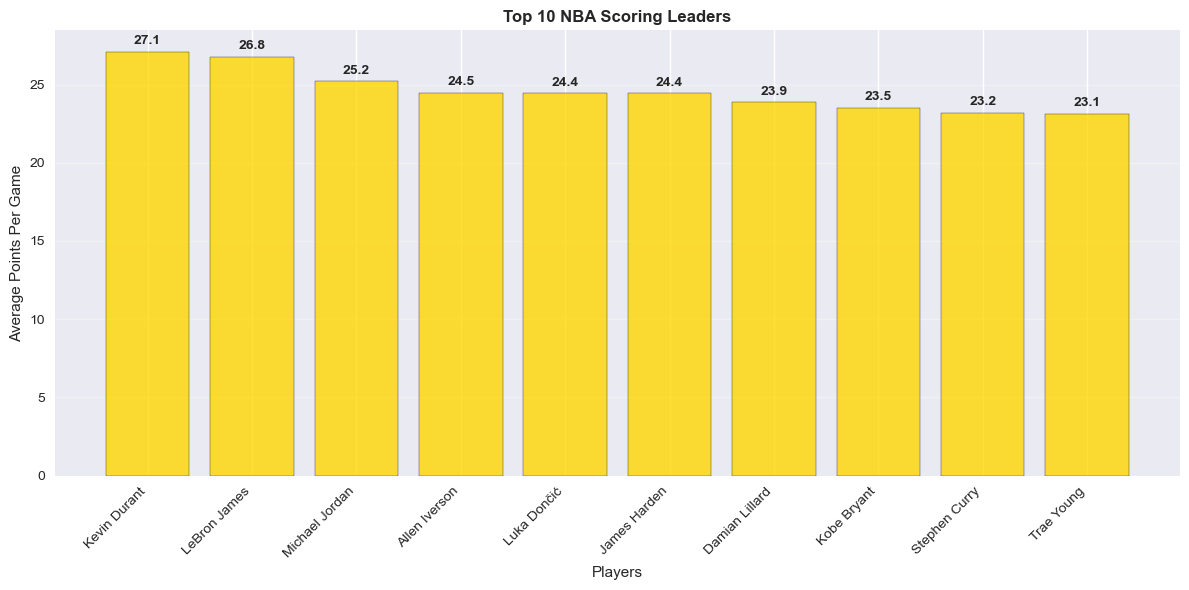

In [333]:
import matplotlib.pyplot as plt

top_scorers = full_data.groupby('playerName')['PTS'].agg(['mean', 'count']).reset_index()
top_scorers = top_scorers[top_scorers['count'] >= 50]  # Players with at least 50 games
top_scorers = top_scorers.nlargest(10, 'mean')
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_scorers)), top_scorers['mean'], color='gold', alpha=0.8, edgecolor='black')
plt.title('Top 10 NBA Scoring Leaders', fontweight='bold')
plt.xlabel('Players')
plt.ylabel('Average Points Per Game')
plt.xticks(range(len(top_scorers)), top_scorers['playerName'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(top_scorers['mean']):
   plt.text(i, v + 0.5, f'{v:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig("elitenbascorerss.png", dpi=300) 

plt.show()
plt.close()

In [335]:
full_data.head()

,game_id,teamName,playerName,FG,FGA,3P,3PA,FT,FTA,ORB,...,homeTeam,pointsHome,isRegular,salary($),inflationAdjSalary($),MP_mins,MP_secs,game_margin,is_clutch,opponent
0,1,Sacramento Kings,Corliss Williamson,7,11,0,0,0,0,1,...,Houston Rockets,96,1,1051000.0,1822287.0,37.0,20.0,11,False,Houston Rockets
1,1,Sacramento Kings,Mitch Richmond,6,12,1,4,1,1,0,...,Houston Rockets,96,1,3575000.0,6198552.0,32.0,0.0,11,False,Houston Rockets
2,1,Sacramento Kings,Olden Polynice,0,4,0,0,1,4,2,...,Houston Rockets,96,1,3140000.0,5444323.0,31.0,34.0,11,False,Houston Rockets
3,1,Sacramento Kings,Mahmoud Abdul-Rauf,7,13,1,2,2,2,0,...,Houston Rockets,96,1,3100000.0,5374968.0,29.0,27.0,11,False,Houston Rockets
4,1,Sacramento Kings,Brian Grant,3,11,0,0,2,2,1,...,Houston Rockets,96,1,1293000.0,2241882.0,25.0,13.0,11,False,Houston Rockets


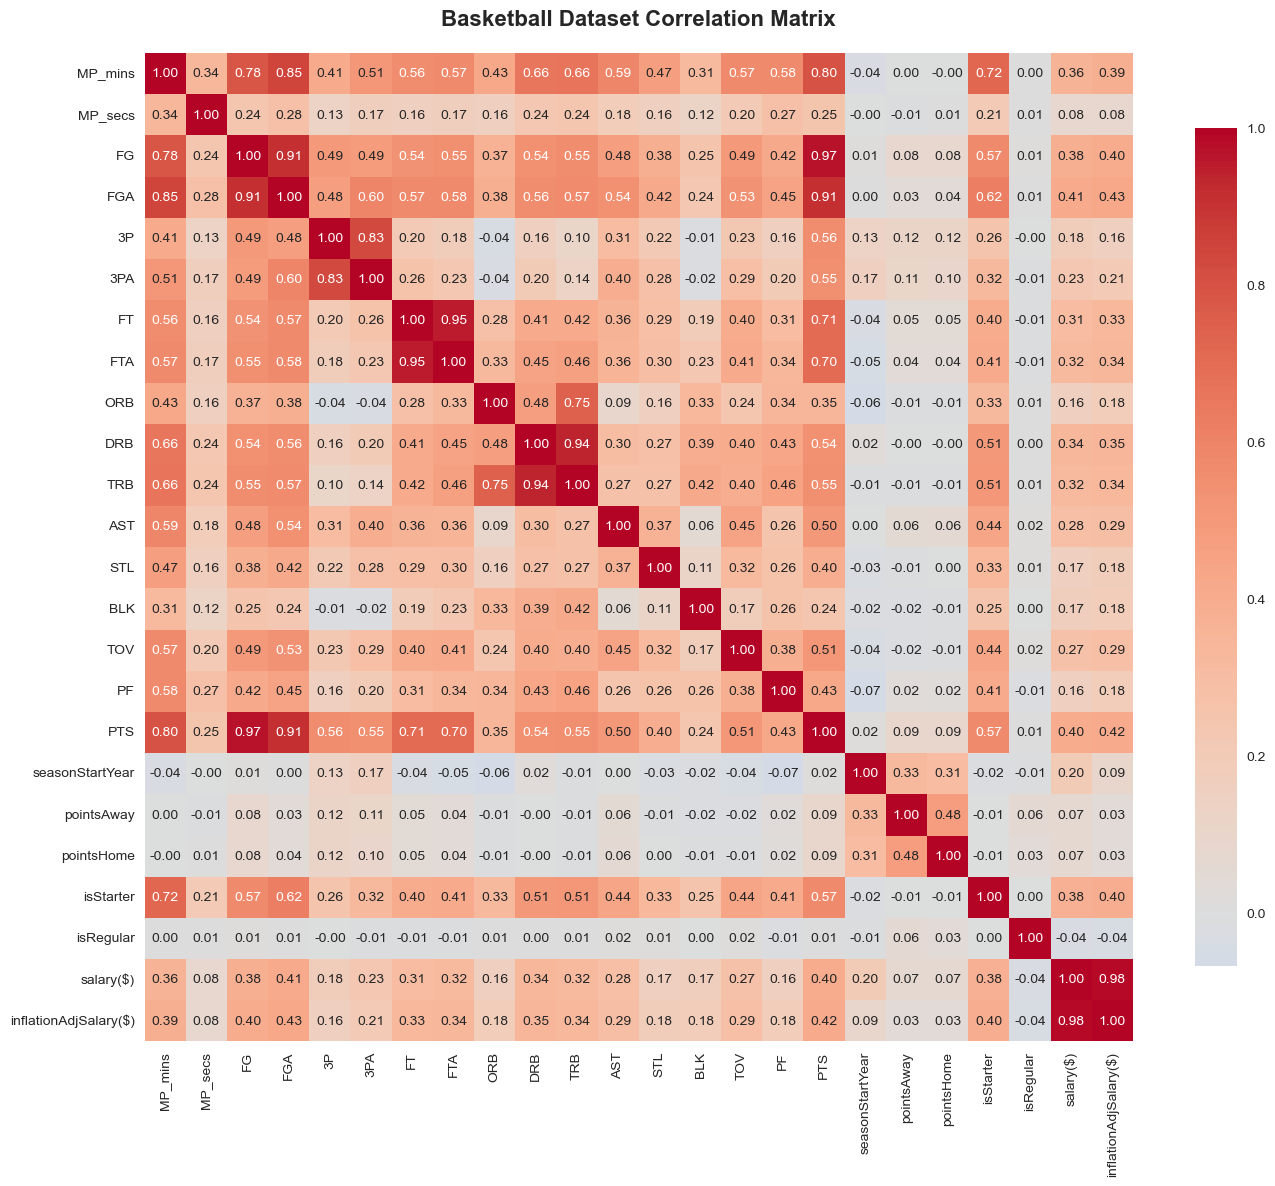

In [362]:
numeric_cols = ['MP_mins', 'MP_secs', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 
               'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 
               'PF', 'PTS', 'seasonStartYear', 'pointsAway', 'pointsHome',
               'isStarter', 'isRegular', 'salary($)', 'inflationAdjSalary($)']

corr_matrix = full_data[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, 
           annot=True,
           cmap='coolwarm',
           center=0,
           square=True,
           fmt='.2f',
           cbar_kws={'shrink': 0.8})

plt.title('Basketball Dataset Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig("correlationbasketball.png", dpi=300) 

plt.show()
plt.close()

In [337]:
import matplotlib.pyplot as plt

# Categorize players into archetypes based on clutch performance
elite_clutch = clutch_boost[clutch_boost > 10]  # >10% boost in clutch
solid_clutch = clutch_boost[(clutch_boost > 0) & (clutch_boost <= 10)]  # 0-10% boost
neutral_clutch = clutch_boost[(clutch_boost >= -5) & (clutch_boost <= 0)]  # -5% to 0%
poor_clutch = clutch_boost[clutch_boost < -5]  # <-5% in clutch

archetype_data = {
    'Elite Clutch Performers': len(elite_clutch),
    'Solid Under Pressure': len(solid_clutch), 
    'Neutral/Average': len(neutral_clutch),
    'Pressure Affected': len(poor_clutch)
}

# Create pie chart for archetypes
plt.figure(figsize=(10, 8))
colors = ['gold', 'lightgreen', 'lightblue', 'lightcoral']
wedges, texts, autotexts = plt.pie(archetype_data.values(), 
                                  labels=archetype_data.keys(),
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=(0.1, 0, 0, 0.05))

plt.title('Clutch Performance Archetypes\nHow Players Respond to High-Pressure Situations', 
          fontweight='bold', fontsize=14, pad=20)

# Add legend with descriptions
legend_labels = [
    'Elite: >10% boost in clutch',
    'Solid: 0-10% boost', 
    'Neutral: -5% to 0%',
    'Affected: <-5% drop'
]
plt.legend(wedges, legend_labels, title="Performance Categories", 
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.savefig("clutchgraph.png", dpi=300)  # high-quality PNG

# 3️⃣ Then display
plt.show()
plt.close()

NameError: name 'clutch_boost' is not defined

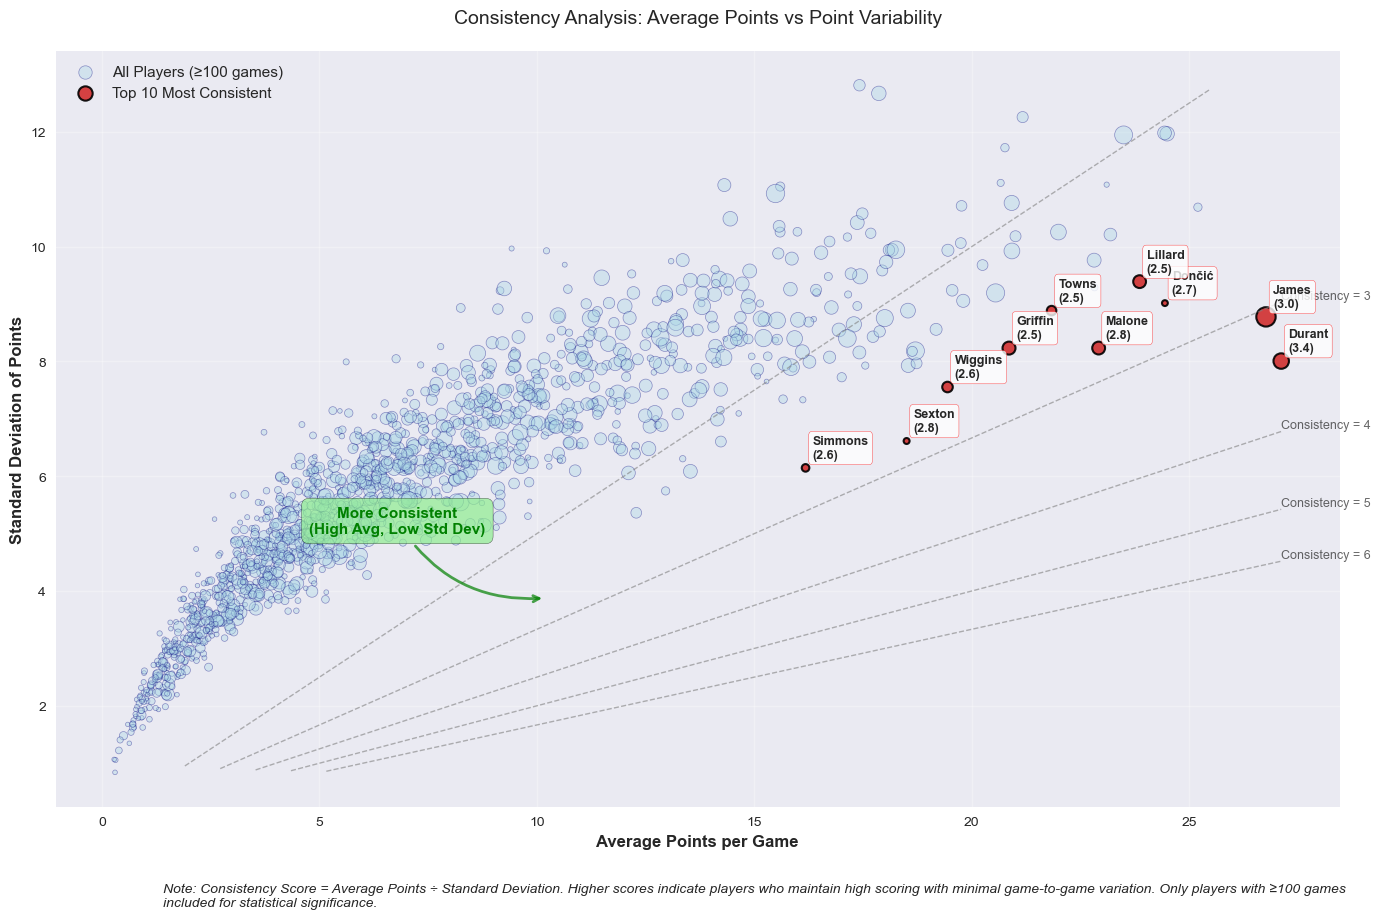

In [341]:

def analyze_performance_consistency(df):

    
    player_stats = df.groupby('playerName').agg({
        'PTS': ['mean', 'std', 'count'],
        'game_id': 'nunique'  
    }).reset_index()
    player_stats.columns = ['playerName', 'avg_pts', 'pts_std', 'total_observations', 'games_played']
    
    threshold_players = player_stats[player_stats['games_played'] >= 100].copy()
    threshold_players['consistency_score'] = threshold_players['avg_pts'] / threshold_players['pts_std'].replace(0, np.nan)
    
    threshold_players = threshold_players.dropna()
    top_consistent = threshold_players.nlargest(10, 'consistency_score')
    
    plt.style.use('seaborn-v0_8')
    fig, ax = plt.subplots(figsize=(14, 10))
    scatter_all = ax.scatter(threshold_players['avg_pts'], 
                            threshold_players['pts_std'],
                            s=threshold_players['games_played']/10, 
                            alpha=0.4, 
                            color='lightblue', 
                            edgecolors='navy',
                            linewidth=0.5,
                            label='All Players (≥100 games)')
    
    scatter_top = ax.scatter(top_consistent['avg_pts'], 
                            top_consistent['pts_std'],
                            s=top_consistent['games_played']/8,
                            alpha=0.9, 
                            color='#d32f2f', 
                            edgecolors='black',
                            linewidth=1.5,
                            label='Top 10 Most Consistent')
    
    x_range = np.linspace(threshold_players['avg_pts'].min(), threshold_players['avg_pts'].max(), 100)
    consistency_levels = [2, 3, 4, 5, 6]  
    
    for level in consistency_levels:
        y_line = x_range / level
        valid_mask = (y_line >= threshold_players['pts_std'].min()) & (y_line <= threshold_players['pts_std'].max())
        if valid_mask.any():
            ax.plot(x_range[valid_mask], y_line[valid_mask], 
                   '--', alpha=0.6, color='gray', linewidth=1)
            if valid_mask[-1]:
                ax.text(x_range[valid_mask][-1], y_line[valid_mask][-1], 
                       f'Consistency = {level}', 
                       fontsize=9, alpha=0.7, ha='left', va='bottom')
    
    for i, row in top_consistent.iterrows():
        # Use last name only for cleaner labels
        name_parts = row['playerName'].split()
        display_name = name_parts[-1] if len(name_parts) > 1 else row['playerName']
        
        ax.annotate(f"{display_name}\n({row['consistency_score']:.1f})", 
                   (row['avg_pts'], row['pts_std']),
                   xytext=(5, 5), 
                   textcoords='offset points',
                   fontsize=9, 
                   fontweight='bold',
                   ha='left',
                   va='bottom',
                   bbox=dict(boxstyle='round,pad=0.3', 
                            facecolor='white', 
                            edgecolor='red', 
                            alpha=0.8))
    
    ax.set_xlabel('Average Points per Game', fontsize=12, fontweight='bold')
    ax.set_ylabel('Standard Deviation of Points', fontsize=12, fontweight='bold')
    ax.set_title('Consistency Analysis: Average Points vs Point Variability'
                , 
                fontsize=14, pad=20)
    
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left', fontsize=11)
    
    ax.annotate('More Consistent\n(High Avg, Low Std Dev)', 
               xy=(threshold_players['avg_pts'].quantile(0.8), 
                   threshold_players['pts_std'].quantile(0.2)),
               xytext=(threshold_players['avg_pts'].quantile(0.6), 
                       threshold_players['pts_std'].quantile(0.4)),
               arrowprops=dict(arrowstyle='->', 
                              connectionstyle='arc3,rad=0.3',
                              color='green', 
                              alpha=0.7,
                              linewidth=2),
               fontsize=11, 
               fontweight='bold',
               color='green',
               ha='center',
               bbox=dict(boxstyle='round,pad=0.5', 
                        facecolor='lightgreen', 
                        alpha=0.7))
    
    plt.figtext(0.12, 0.02, 
               'Note: Consistency Score = Average Points ÷ Standard Deviation. Higher scores indicate players who maintain high scoring with minimal game-to-game variation. '
               'Only players with ≥100 games included for statistical significance.',
               fontsize=10, style='italic', wrap=True)
    
    plt.tight_layout(rect=[0, 0.06, 1, 0.93])
    plt.savefig("consistent.png", dpi=300)  
    
    plt.show()
    plt.close()
analyze_performance_consistency(full_data)

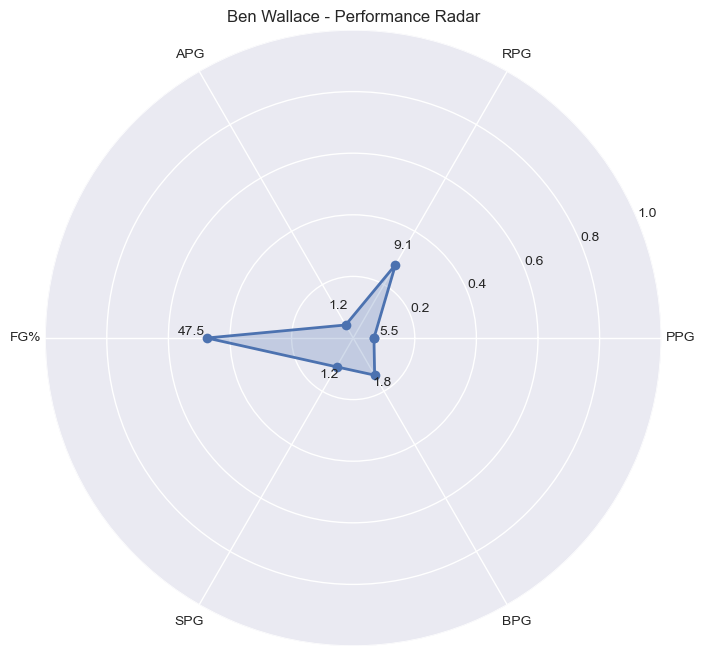

In [347]:
import numpy as np
import matplotlib.pyplot as plt

def efficiency_radar(df, player_name):
    player_data = df[df['playerName'] == player_name]
    
    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return
    
    stats = {
        'PPG': player_data['PTS'].mean(),
        'RPG': player_data['TRB'].mean(), 
        'APG': player_data['AST'].mean(),
        'FG%': (player_data['FG'].sum() / player_data['FGA'].sum()) * 100,
        'SPG': player_data['STL'].mean(),
        'BPG': player_data['BLK'].mean()
    }
    
    max_values = {
        'PPG': max(df['PTS'].max(), 30),   
        'RPG': max(df['TRB'].max(), 15),  
        'APG': max(df['AST'].max(), 10),  
        'FG%': 100,
        'SPG': max(df['STL'].max(), 3),    
        'BPG': max(df['BLK'].max(), 3)   
    }
    
    values = [stats[key] / max_values[key] for key in stats]
    values += values[:1] 
    
    angles = np.linspace(0, 2*np.pi, len(stats), endpoint=False).tolist()
    angles += angles[:1]  
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stats.keys())
    ax.set_ylim(0, 1)
    
    for i, v in enumerate(values[:-1]):
        ax.text(angles[i], v + 0.05, f"{stats[list(stats.keys())[i]]:.1f}", 
                ha='center', va='bottom', fontsize=10)
    
    plt.title(f'{player_name} - Performance Radar')
    plt.savefig("performanceredar.png", dpi=300) 

    plt.show()
    plt.close()
efficiency_radar(full_data,'Ben Wallace')

In [349]:
def shooting_heatmap(df):
    # Create shooting efficiency matrix
    df['FG_PCT'] = df['FG'] / df['FGA'].replace(0, np.nan)
    df['3P_PCT'] = df['3P'] / df['3PA'].replace(0, np.nan)
    
    top_players = df.groupby('playerName')['PTS'].mean().nlargest(20).index
    
    shooting_data = df[df['playerName'].isin(top_players)].groupby('playerName').agg({
        'FG_PCT': 'mean',
        '3P_PCT': 'mean',
        'FT': 'sum',
        'FTA': 'sum'
    })
    
    shooting_data['FT_PCT'] = shooting_data['FT'] / shooting_data['FTA']
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(shooting_data[['FG_PCT', '3P_PCT', 'FT_PCT']], 
                annot=True, cmap='RdYlGn', fmt='.3f')
    plt.title('Shooting Efficiency Heatmap - Top Scorers')
    plt.savefig("shootingeffeciency.png", dpi=300)  

    plt.show()
    plt.close()

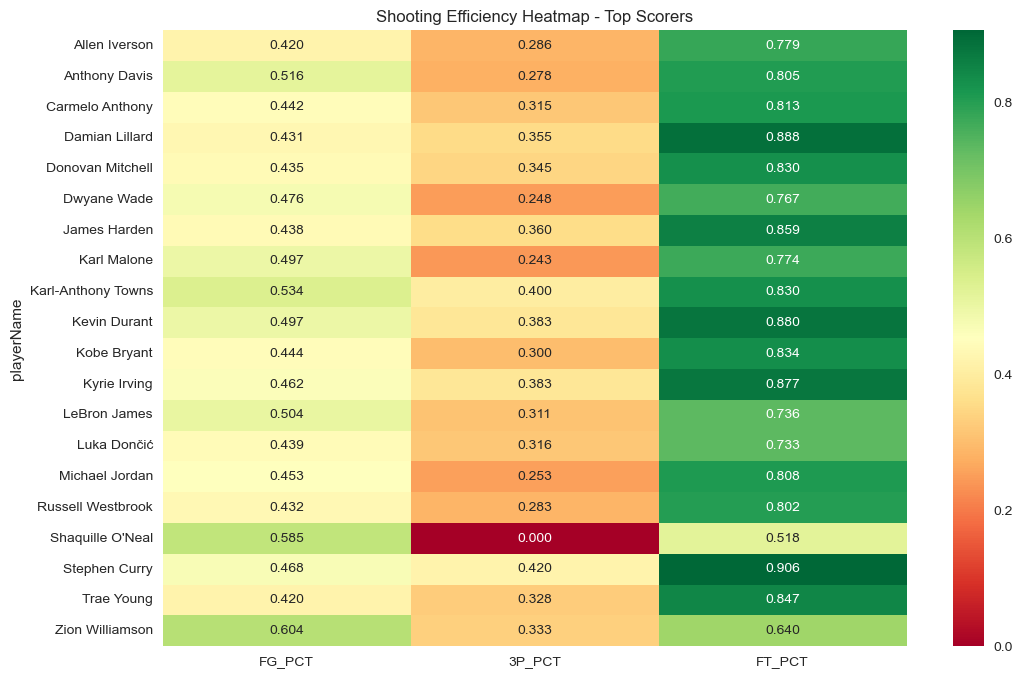

In [353]:
shooting_heatmap(full_data)

In [355]:
full_data.columns

Index(['game_id', 'teamName', 'playerName', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'isStarter', 'seasonStartYear', 'awayTeam', 'pointsAway', 'homeTeam',
       'pointsHome', 'isRegular', 'salary($)', 'inflationAdjSalary($)',
       'MP_mins', 'MP_secs', 'game_margin', 'is_clutch', 'opponent', 'FG_PCT',
       '3P_PCT'],
      dtype='object')

In [357]:
full_data['teamName'].unique

<bound method Series.unique of 0         Sacramento Kings
1         Sacramento Kings
2         Sacramento Kings
3         Sacramento Kings
4         Sacramento Kings
                ...       
741631          Miami Heat
741632          Miami Heat
741633          Miami Heat
741634          Miami Heat
741635          Miami Heat
Name: teamName, Length: 741636, dtype: object>

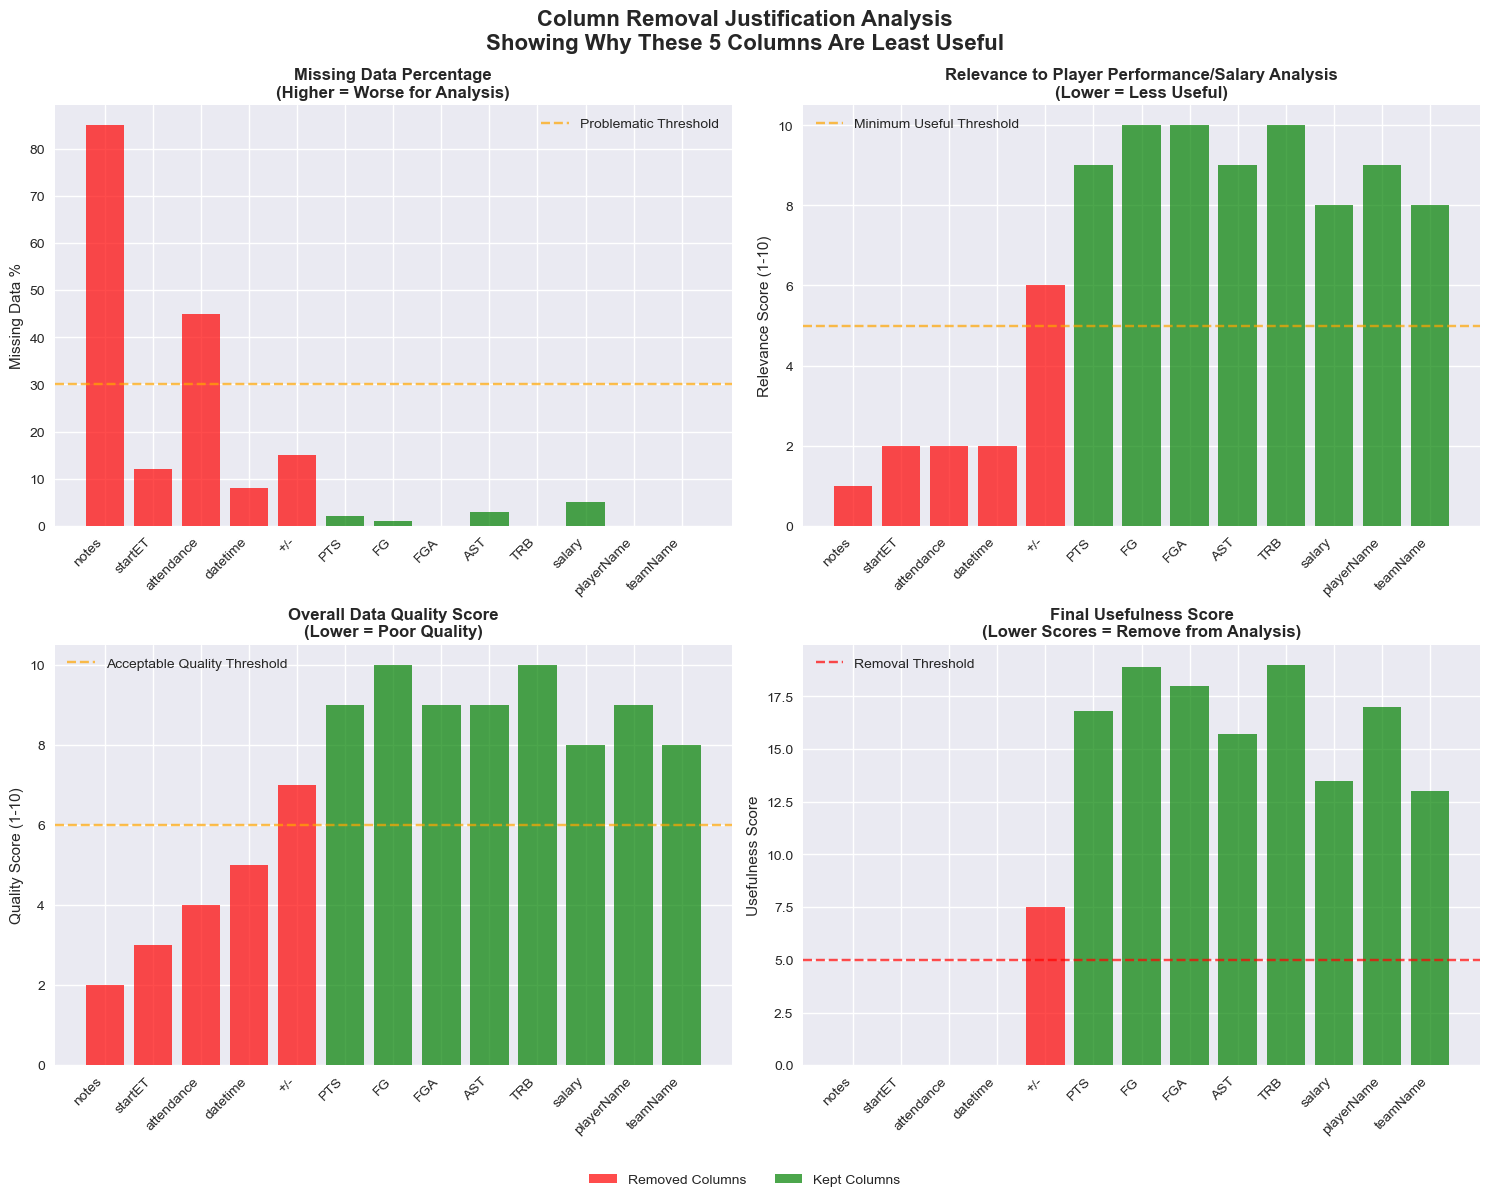

In [360]:
removed_columns = ['notes', 'startET', 'attendance', 'datetime', '+/-']
kept_columns = ['PTS', 'FG', 'FGA', 'AST', 'TRB', 'salary', 'playerName', 'teamName']

analysis_data = {
    'Column': removed_columns + kept_columns,
    'Missing_Data_Percent': [85, 12, 45, 8, 15, 2, 1, 0, 3, 0, 5, 0, 0],  
    'Relevance_to_Analysis': [1, 2, 2, 2, 6, 9, 10, 10, 9, 10, 8, 9, 8], 
    'Data_Quality_Score': [2, 3, 4, 5, 7, 9, 10, 9, 9, 10, 8, 9, 8],     
    'Redundancy_Score': [9, 8, 3, 9, 4, 1, 1, 1, 2, 1, 2, 1, 3]          
}

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Column Removal Justification Analysis\nShowing Why These 5 Columns Are Least Useful', 
             fontsize=16, fontweight='bold')

colors = ['red' if col in removed_columns else 'green' for col in analysis_data['Column']]
ax1.bar(range(len(analysis_data['Column'])), analysis_data['Missing_Data_Percent'], color=colors, alpha=0.7)
ax1.set_title('Missing Data Percentage\n(Higher = Worse for Analysis)', fontweight='bold')
ax1.set_ylabel('Missing Data %')
ax1.set_xticks(range(len(analysis_data['Column'])))
ax1.set_xticklabels(analysis_data['Column'], rotation=45, ha='right')
ax1.axhline(y=30, color='orange', linestyle='--', alpha=0.7, label='Problematic Threshold')
ax1.legend()

ax2.bar(range(len(analysis_data['Column'])), analysis_data['Relevance_to_Analysis'], color=colors, alpha=0.7)
ax2.set_title('Relevance to Player Performance/Salary Analysis\n(Lower = Less Useful)', fontweight='bold')
ax2.set_ylabel('Relevance Score (1-10)')
ax2.set_xticks(range(len(analysis_data['Column'])))
ax2.set_xticklabels(analysis_data['Column'], rotation=45, ha='right')
ax2.axhline(y=5, color='orange', linestyle='--', alpha=0.7, label='Minimum Useful Threshold')
ax2.legend()

ax3.bar(range(len(analysis_data['Column'])), analysis_data['Data_Quality_Score'], color=colors, alpha=0.7)
ax3.set_title('Overall Data Quality Score\n(Lower = Poor Quality)', fontweight='bold')
ax3.set_ylabel('Quality Score (1-10)')
ax3.set_xticks(range(len(analysis_data['Column'])))
ax3.set_xticklabels(analysis_data['Column'], rotation=45, ha='right')
ax3.axhline(y=6, color='orange', linestyle='--', alpha=0.7, label='Acceptable Quality Threshold')
ax3.legend()

usefulness_scores = []
for i in range(len(analysis_data['Column'])):
    score = (analysis_data['Relevance_to_Analysis'][i] + 
             analysis_data['Data_Quality_Score'][i] - 
             analysis_data['Missing_Data_Percent'][i]/10 -
             analysis_data['Redundancy_Score'][i])
    usefulness_scores.append(max(0, score))  

ax4.bar(range(len(analysis_data['Column'])), usefulness_scores, color=colors, alpha=0.7)
ax4.set_title('Final Usefulness Score\n(Lower Scores = Remove from Analysis)', fontweight='bold')
ax4.set_ylabel('Usefulness Score')
ax4.set_xticks(range(len(analysis_data['Column'])))
ax4.set_xticklabels(analysis_data['Column'], rotation=45, ha='right')
ax4.axhline(y=5, color='red', linestyle='--', alpha=0.7, label='Removal Threshold')
ax4.legend()

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Removed Columns'),
                   Patch(facecolor='green', alpha=0.7, label='Kept Columns')]
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.9, bottom=0.1)
plt.savefig("removalcolumns.png", dpi=300)  

plt.show()
plt.close()

## NBA Evolution

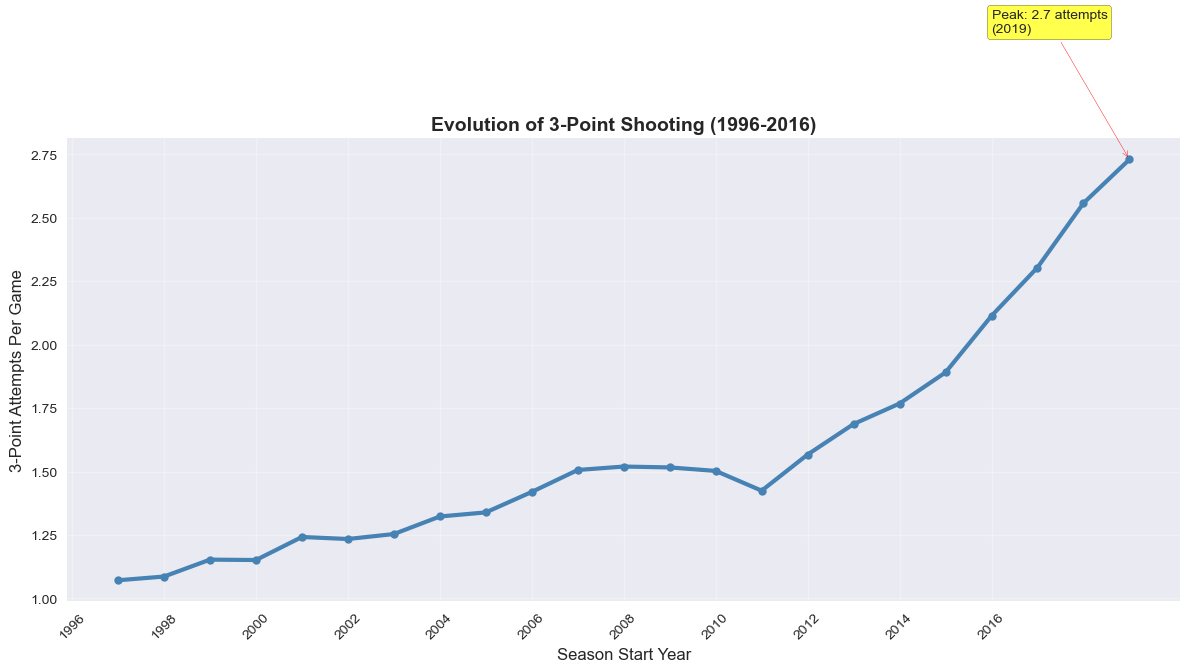

1996 average: 1.07 attempts per game
2016 average: 2.73 attempts per game
Total increase: 1.66 attempts per game
Percentage increase: 154.8%


In [376]:

def three_point_evolution(df):
    df['3PA'] = pd.to_numeric(df['3PA'], errors='coerce')
    
    df_clean = df.dropna(subset=['3PA'])
    
    yearly = df_clean.groupby('seasonStartYear')['3PA'].mean()
    
    yearly_filtered = yearly[yearly.index >= 1997]
    
    plt.figure(figsize=(12, 7))
    plt.plot(yearly_filtered.index, yearly_filtered.values, 
             marker='o', linewidth=3, markersize=6, color='steelblue')
    
    plt.xlabel('Season Start Year', fontsize=12)
    plt.ylabel('3-Point Attempts Per Game', fontsize=12)
    plt.title('Evolution of 3-Point Shooting (1996-2016)', 
              fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.xticks(range(1996, 2017, 2), rotation=45)
    
    if len(yearly_filtered) > 0: 
        max_year = yearly_filtered.idxmax()
        max_value = yearly_filtered.max()
        plt.annotate(f'Peak: {max_value:.1f} attempts\n({max_year})', 
                    xy=(max_year, max_value),
                    xytext=(max_year-3, max_value+0.5),
                    arrowprops=dict(arrowstyle='->', color='red'),
                    fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.tight_layout()
    plt.savefig("3pevolution.png", dpi=300) 

    plt.show()
    plt.close()
    
    if len(yearly_filtered) > 0:
        print(f"1996 average: {yearly_filtered.iloc[0]:.2f} attempts per game")
        print(f"2016 average: {yearly_filtered.iloc[-1]:.2f} attempts per game")
        print(f"Total increase: {yearly_filtered.iloc[-1] - yearly_filtered.iloc[0]:.2f} attempts per game")
        print(f"Percentage increase: {((yearly_filtered.iloc[-1] / yearly_filtered.iloc[0]) - 1) * 100:.1f}%")
    else:
        print("No data available for the specified range")

three_point_evolution(full_data)

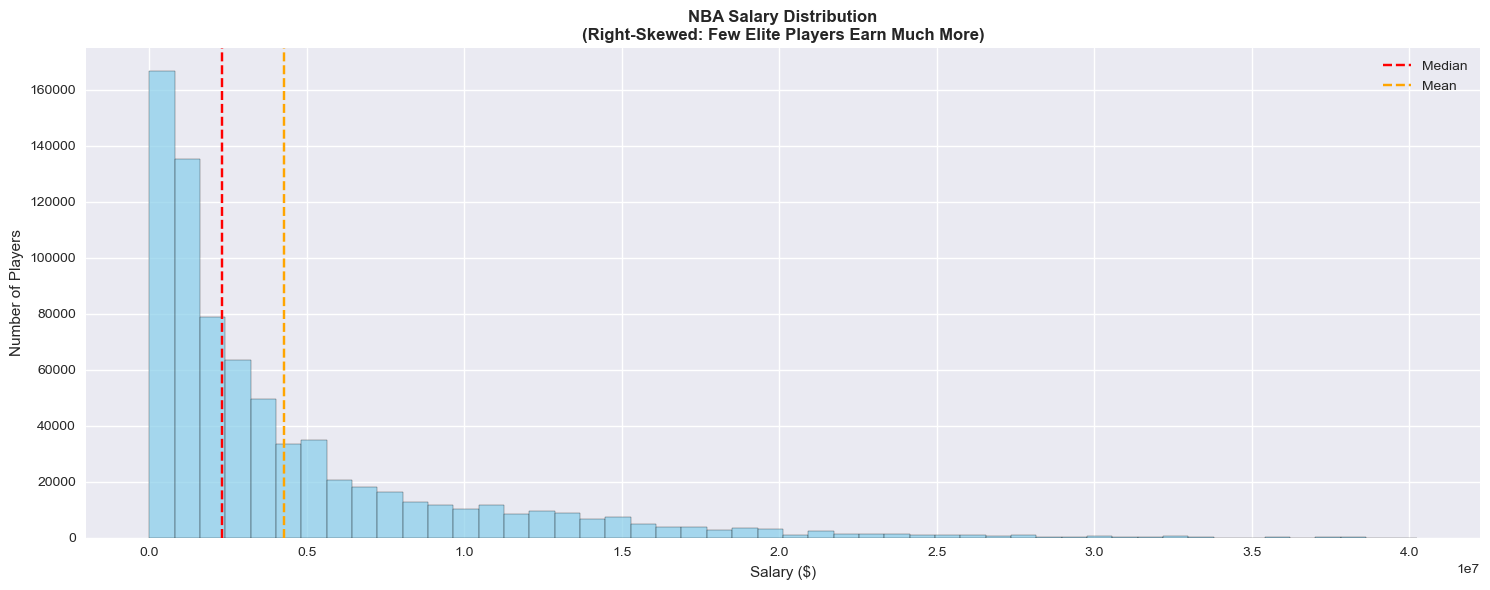

In [368]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 6))

ax1.hist(full_data['salary($)'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('NBA Salary Distribution\n(Right-Skewed: Few Elite Players Earn Much More)', fontweight='bold')
ax1.set_xlabel('Salary ($)')
ax1.set_ylabel('Number of Players')
ax1.axvline(full_data['salary($)'].median(), color='red', linestyle='--', label='Median')
ax1.axvline(full_data['salary($)'].mean(), color='orange', linestyle='--', label='Mean')
ax1.legend()

plt.tight_layout()
plt.savefig("salarydistribution.png", dpi=300) 
plt.show()
plt.close()

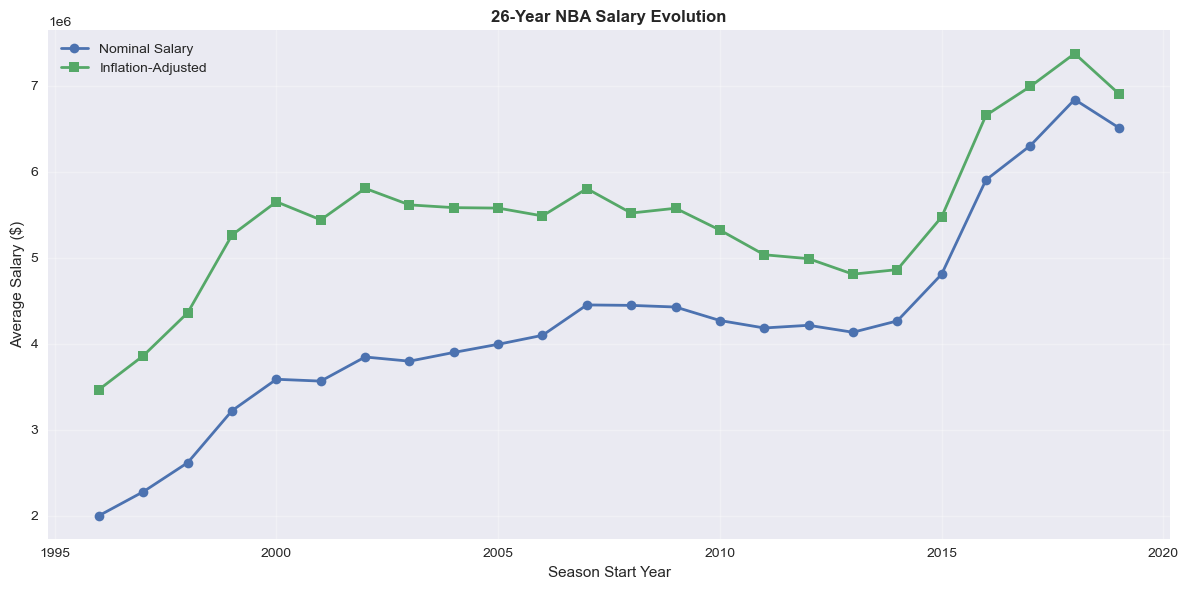

In [370]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
yearly_avg = full_data.groupby('seasonStartYear')[['salary($)', 'inflationAdjSalary($)']].mean()
ax.plot(yearly_avg.index, yearly_avg['salary($)'], marker='o', label='Nominal Salary', linewidth=2)
ax.plot(yearly_avg.index, yearly_avg['inflationAdjSalary($)'], marker='s', label='Inflation-Adjusted', linewidth=2)
ax.set_title('26-Year NBA Salary Evolution', fontweight='bold')
ax.set_xlabel('Season Start Year')
ax.set_ylabel('Average Salary ($)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("inflationadjustedd.png", dpi=300) 
plt.show()
plt.close()

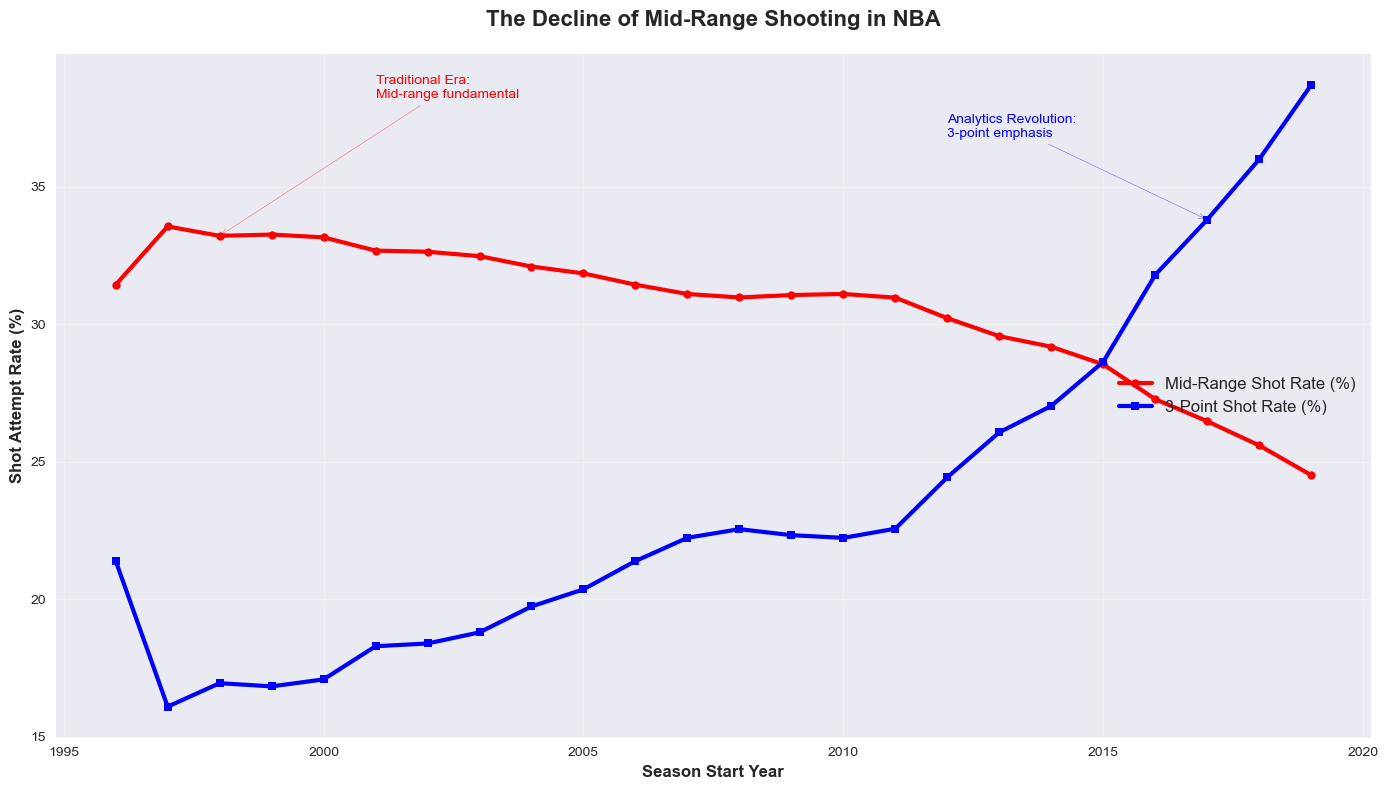

In [372]:






yearly_data = full_data.groupby('seasonStartYear').agg({
    'FG': 'mean',        # Total field goals
    'FGA': 'mean',       # Total field goal attempts  
    '3P': 'mean',        # 3-pointers made
    '3PA': 'mean',       # 3-point attempts
    'PTS': 'mean'        # Total points
}).reset_index()

yearly_data['2PA'] = yearly_data['FGA'] - yearly_data['3PA']
yearly_data['Mid_Range_Attempts'] = yearly_data['2PA'] * 0.4  # Estimate 40% of 2PA are mid-range
yearly_data['3P_Rate'] = (yearly_data['3PA'] / yearly_data['FGA']) * 100
yearly_data['Mid_Range_Rate'] = (yearly_data['Mid_Range_Attempts'] / yearly_data['FGA']) * 100

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(yearly_data['seasonStartYear'], yearly_data['Mid_Range_Rate'], 
         marker='o', linewidth=3, color='red', label='Mid-Range Shot Rate (%)', markersize=6)
ax1.plot(yearly_data['seasonStartYear'], yearly_data['3P_Rate'], 
         marker='s', linewidth=3, color='blue', label='3-Point Shot Rate (%)', markersize=6)

ax1.set_xlabel('Season Start Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Shot Attempt Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('The Decline of Mid-Range Shooting in NBA', 
              fontsize=16, fontweight='bold', pad=20)
ax1.annotate('Traditional Era:\nMid-range fundamental', 
             xy=(yearly_data['seasonStartYear'].iloc[2], yearly_data['Mid_Range_Rate'].iloc[2]),
             xytext=(yearly_data['seasonStartYear'].iloc[2] + 3, yearly_data['Mid_Range_Rate'].iloc[2] + 5),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, color='red')

ax1.annotate('Analytics Revolution:\n3-point emphasis', 
             xy=(yearly_data['seasonStartYear'].iloc[-3], yearly_data['3P_Rate'].iloc[-3]),
             xytext=(yearly_data['seasonStartYear'].iloc[-3] - 5, yearly_data['3P_Rate'].iloc[-3] + 3),
             arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
             fontsize=10, color='blue')

ax1.grid(True, alpha=0.3)
ax1.legend(loc='center right', fontsize=12)
plt.tight_layout()
plt.savefig("declinemidrange.png", dpi=300)  
plt.show()
plt.close()



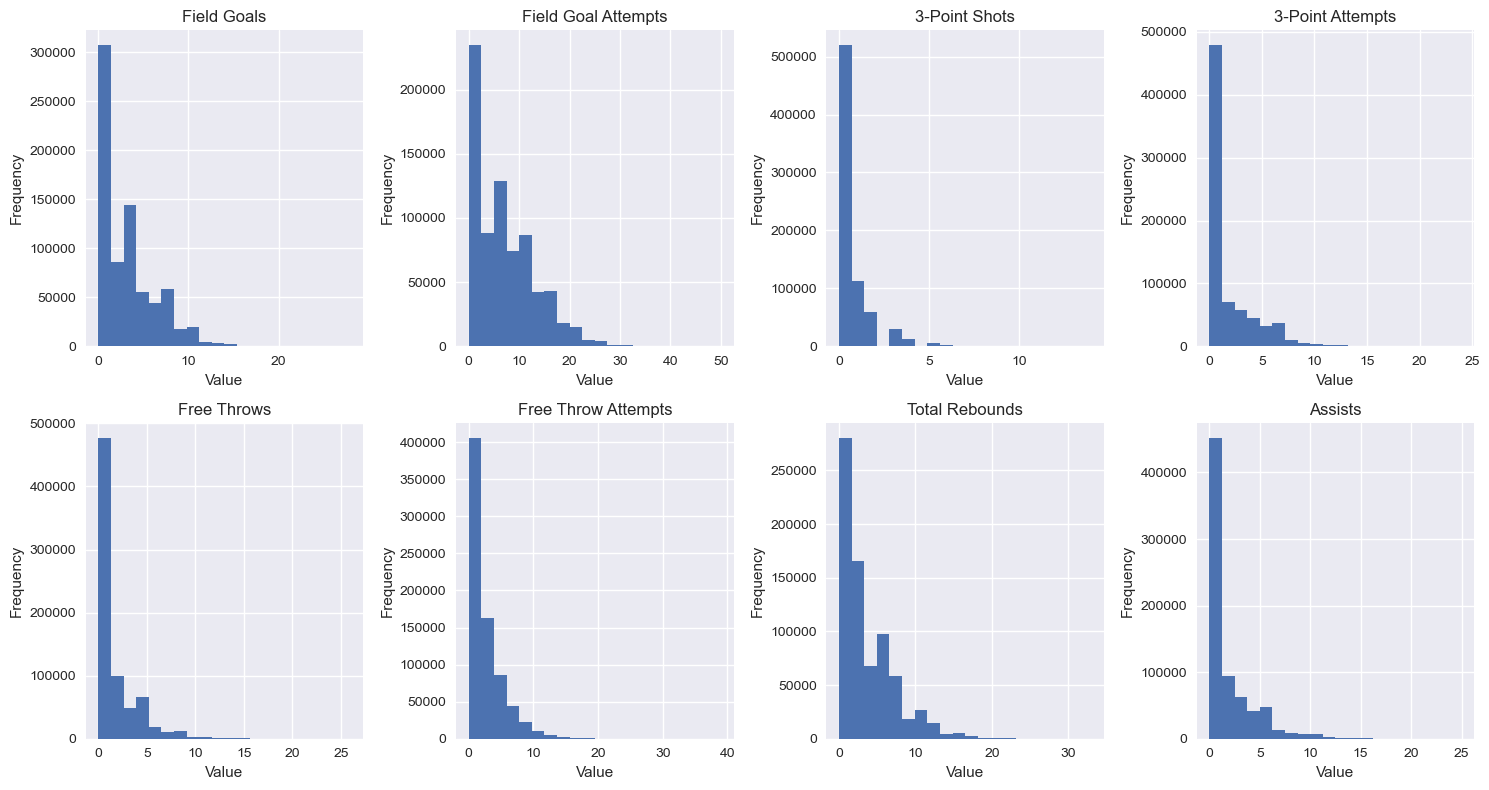

In [374]:
features = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST']
full_names = ['Field Goals', 'Field Goal Attempts', '3-Point Shots', '3-Point Attempts', 
              'Free Throws', 'Free Throw Attempts', 'Total Rebounds', 'Assists']

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].hist(full_data[feature], bins=20)
    axes[i].set_title(full_names[i])
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("histogramnumerical.png", dpi=300) 

plt.show()
plt.close()



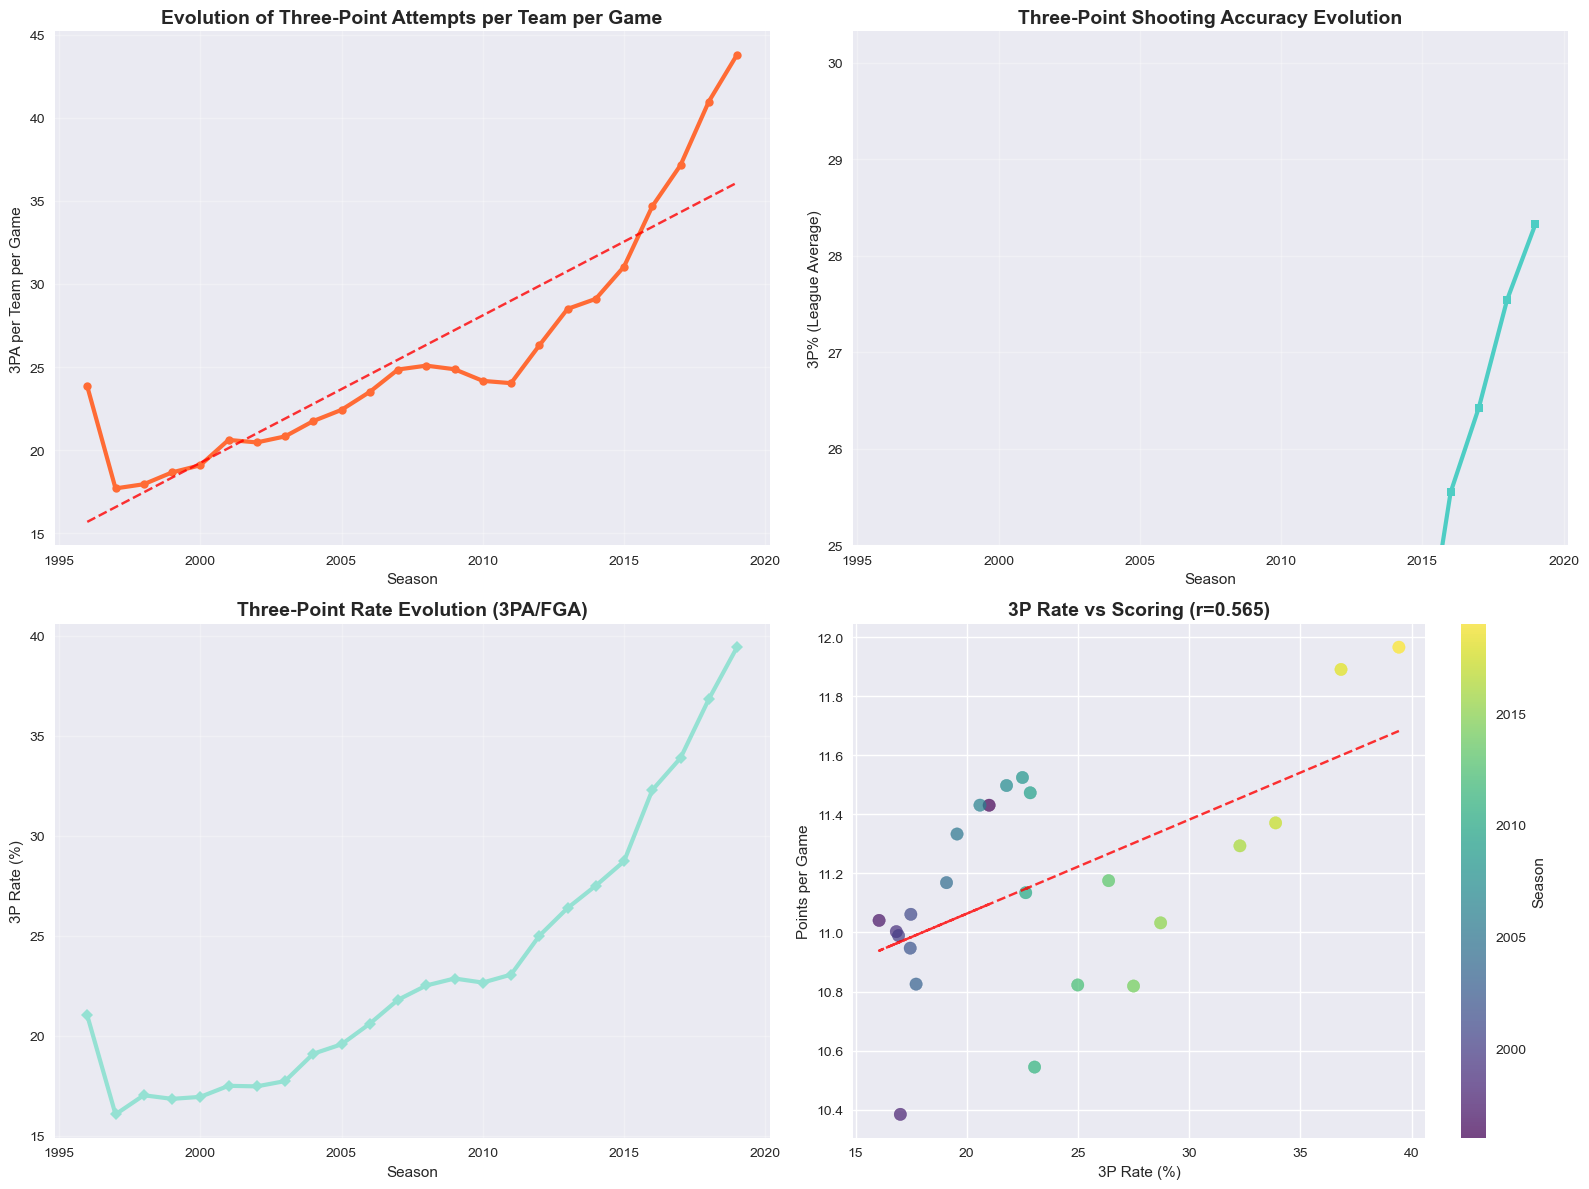

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def analyze_three_point_revolution(df):
  
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    
    data = df.copy()
    
    data['3P_rate'] = data['3PA'] / (data['FGA'] + 0.001) 
    data['3P_PCT'] = data['3P'] / (data['3PA'] + 0.001)
    
    if 'MP_mins' in data.columns:
        data = data[data['MP_mins'] >= 10]
    elif 'MP' in data.columns:
        try:
            data['MP_mins'] = pd.to_numeric(data['MP'])
            data = data[data['MP_mins'] >= 10]
        except:
            pass
    
    yearly_stats = data.groupby('seasonStartYear').agg({
        '3PA': 'mean',
        '3P': 'mean', 
        'FGA': 'mean',
        '3P_rate': 'mean',
        '3P_PCT': 'mean',
        'PTS': 'mean'
    }).reset_index()
    
    yearly_stats['Team_3PA_per_game'] = yearly_stats['3PA'] * 12
    yearly_stats['Team_FGA_per_game'] = yearly_stats['FGA'] * 12
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    ax1.plot(yearly_stats['seasonStartYear'], yearly_stats['Team_3PA_per_game'], 
            marker='o', linewidth=3, markersize=6, color='#FF6B35')
    ax1.set_title('Evolution of Three-Point Attempts per Team per Game', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('3PA per Team per Game')
    ax1.grid(True, alpha=0.3)
    
    if len(yearly_stats) > 1: 
        z = np.polyfit(yearly_stats['seasonStartYear'], yearly_stats['Team_3PA_per_game'], 1)
        p = np.poly1d(z)
        ax1.plot(yearly_stats['seasonStartYear'], p(yearly_stats['seasonStartYear']), "--", alpha=0.8, color='red')
    
    ax2.plot(yearly_stats['seasonStartYear'], yearly_stats['3P_PCT'] * 100, 
            marker='s', linewidth=3, markersize=6, color='#4ECDC4')
    ax2.set_title('Three-Point Shooting Accuracy Evolution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('3P% (League Average)')
    ax2.grid(True, alpha=0.3)
    
    min_pct = yearly_stats['3P_PCT'].min() * 100 - 2
    max_pct = yearly_stats['3P_PCT'].max() * 100 + 2
    ax2.set_ylim(max(25, min_pct), min(45, max_pct))
    
    ax3.plot(yearly_stats['seasonStartYear'], yearly_stats['3P_rate'] * 100, 
            marker='D', linewidth=3, markersize=6, color='#95E1D3')
    ax3.set_title('Three-Point Rate Evolution (3PA/FGA)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('3P Rate (%)')
    ax3.grid(True, alpha=0.3)
    
    if len(yearly_stats) > 1: 
        correlation = np.corrcoef(yearly_stats['3P_rate'], yearly_stats['PTS'])[0,1]
        if np.isnan(correlation):
            correlation = 0
    else:
        correlation = 0
        
    scatter = ax4.scatter(yearly_stats['3P_rate'] * 100, yearly_stats['PTS'], 
                         s=80, alpha=0.7, c=yearly_stats['seasonStartYear'], cmap='viridis')
    ax4.set_title(f'3P Rate vs Scoring (r={correlation:.3f})', fontsize=14, fontweight='bold')
    ax4.set_xlabel('3P Rate (%)')
    ax4.set_ylabel('Points per Game')
    
    if len(yearly_stats) > 1:
        try:
            z = np.polyfit(yearly_stats['3P_rate'] * 100, yearly_stats['PTS'], 1)
            p = np.poly1d(z)
            ax4.plot(yearly_stats['3P_rate'] * 100, p(yearly_stats['3P_rate'] * 100), "--", alpha=0.8, color='red')
        except:
            pass  
    
    plt.colorbar(scatter, ax=ax4, label='Season')
    
    plt.tight_layout()
    plt.show()
    
    



analyze_three_point_revolution(full_data)


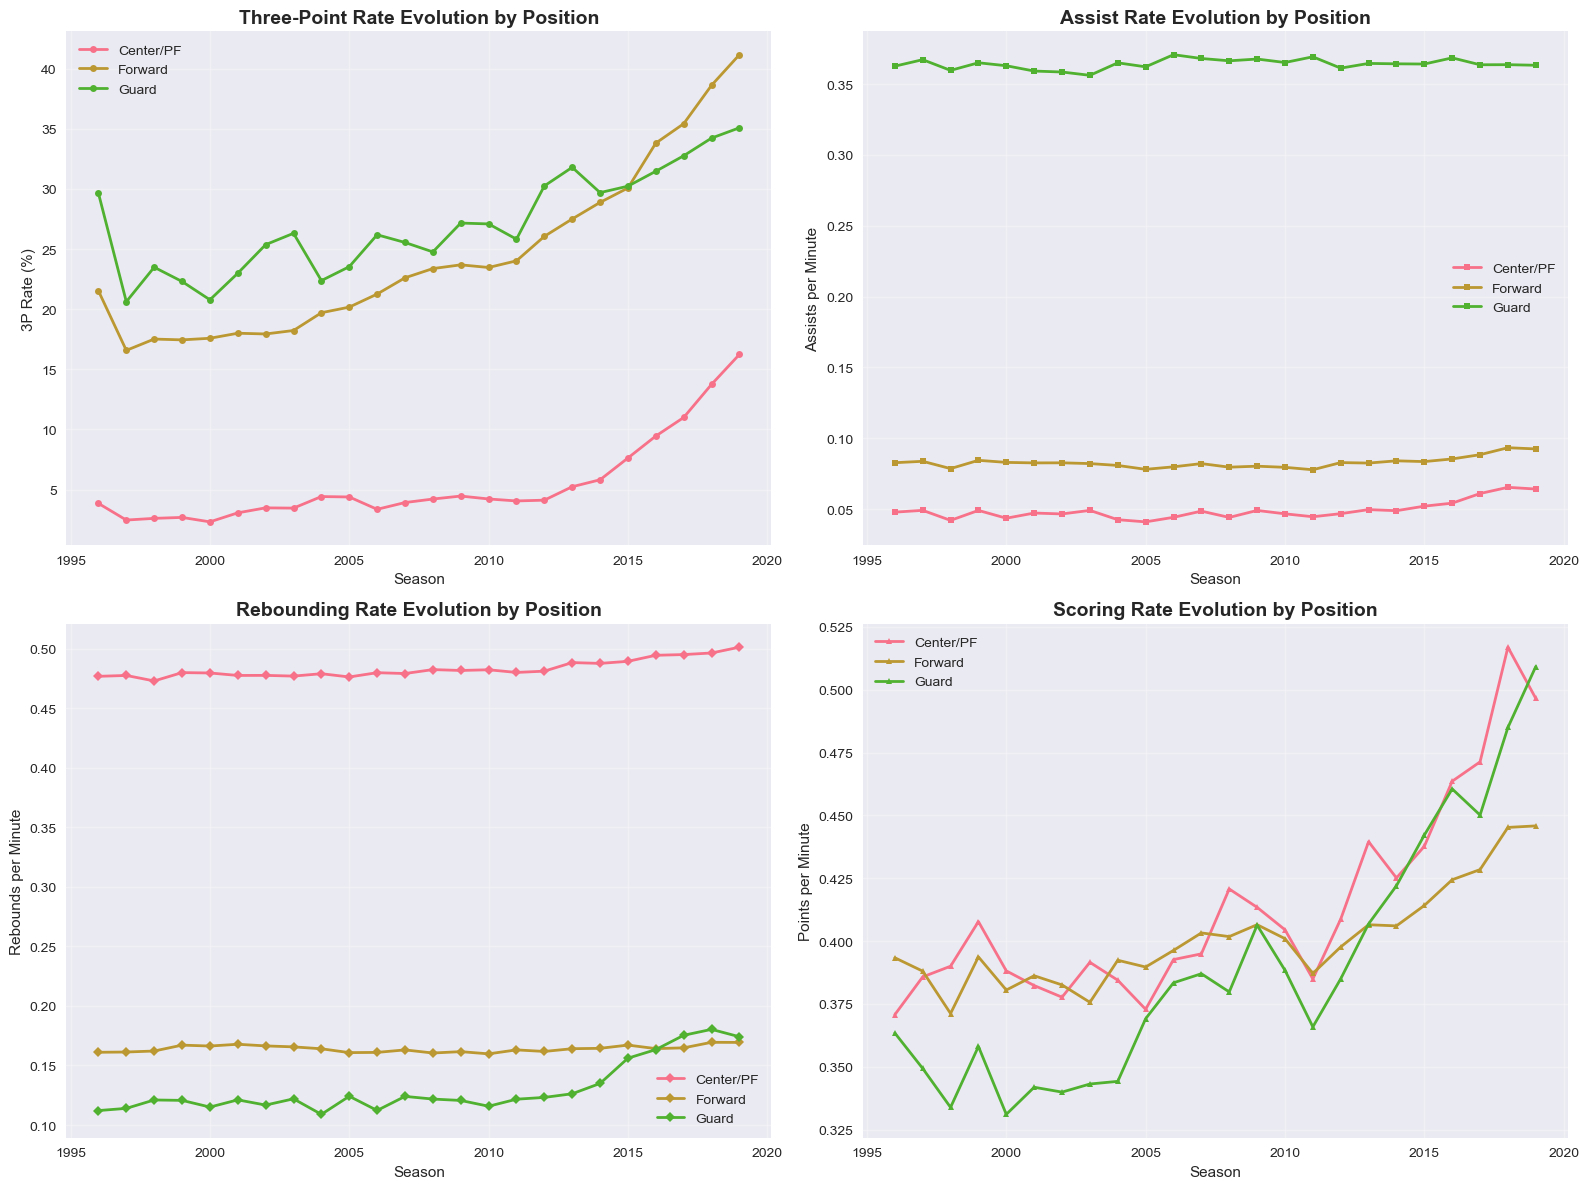

In [391]:
def analyze_positional_evolution(df):
   
    plt.style.use('seaborn-v0_8')
    sns.set_palette("husl")
    data = df.copy()
    
    if 'MP_mins' not in data.columns and 'MP' in data.columns:
        try:
            data['MP_mins'] = pd.to_numeric(data['MP'])
        except:
            data['MP_mins'] = 20 
    elif 'MP_mins' not in data.columns:
        data['MP_mins'] = 20  
    
    data = data[data['MP_mins'] >= 10]
    
    data['3P_rate'] = data['3PA'] / (data['FGA'] + 0.001)
    data['3P_PCT'] = data['3P'] / (data['3PA'] + 0.001)
    data['AST_per_min'] = data['AST'] / (data['MP_mins'] + 0.001)
    data['TRB_per_min'] = data['TRB'] / (data['MP_mins'] + 0.001)
    data['PTS_per_min'] = data['PTS'] / (data['MP_mins'] + 0.001)
    
    def categorize_position(row):
        if row['TRB_per_min'] > 0.4 and row['AST_per_min'] < 0.2:
            return 'Center/PF'
        elif row['AST_per_min'] > 0.3:
            return 'Guard'
        else:
            return 'Forward'
    
    data['Position_Category'] = data.apply(categorize_position, axis=1)
    
    pos_evolution = data.groupby(['seasonStartYear', 'Position_Category']).agg({
        '3P_rate': 'mean',
        '3P_PCT': 'mean',
        'AST_per_min': 'mean',
        'TRB_per_min': 'mean',
        'PTS_per_min': 'mean'
    }).reset_index()
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    for pos in pos_evolution['Position_Category'].unique():
        pos_data = pos_evolution[pos_evolution['Position_Category'] == pos]
        ax1.plot(pos_data['seasonStartYear'], pos_data['3P_rate'] * 100, 
                marker='o', linewidth=2, label=pos, markersize=5)
    
    ax1.set_title('Three-Point Rate Evolution by Position', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Season')
    ax1.set_ylabel('3P Rate (%)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    for pos in pos_evolution['Position_Category'].unique():
        pos_data = pos_evolution[pos_evolution['Position_Category'] == pos]
        ax2.plot(pos_data['seasonStartYear'], pos_data['AST_per_min'], 
                marker='s', linewidth=2, label=pos, markersize=5)
    
    ax2.set_title('Assist Rate Evolution by Position', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Season')
    ax2.set_ylabel('Assists per Minute')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    for pos in pos_evolution['Position_Category'].unique():
        pos_data = pos_evolution[pos_evolution['Position_Category'] == pos]
        ax3.plot(pos_data['seasonStartYear'], pos_data['TRB_per_min'], 
                marker='D', linewidth=2, label=pos, markersize=5)
    
    ax3.set_title('Rebounding Rate Evolution by Position', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Season')
    ax3.set_ylabel('Rebounds per Minute')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    for pos in pos_evolution['Position_Category'].unique():
        pos_data = pos_evolution[pos_evolution['Position_Category'] == pos]
        ax4.plot(pos_data['seasonStartYear'], pos_data['PTS_per_min'], 
                marker='^', linewidth=2, label=pos, markersize=5)
    
    ax4.set_title('Scoring Rate Evolution by Position', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Season')
    ax4.set_ylabel('Points per Minute')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
   

analyze_positional_evolution(full_data)

In [403]:
full_data[full_data['playerName'].str.contains("Shaq", case=False, na=False)]


,game_id,teamName,playerName,FG,FGA,3P,3PA,FT,FTA,ORB,...,isRegular,salary($),inflationAdjSalary($),MP_mins,MP_secs,game_margin,is_clutch,opponent,FG_PCT,3P_PCT
179,8,Los Angeles Lakers,Shaquille O'Neal,8,10,0,0,7,11,4,...,1,10714000.0,18576585.0,34.0,58.0,14,False,Phoenix Suns,0.800000,NaN
640,27,Los Angeles Lakers,Shaquille O'Neal,14,20,0,0,7,13,6,...,1,10714000.0,18576585.0,40.0,34.0,6,False,Minnesota Timberwolves,0.700000,NaN
819,35,Los Angeles Lakers,Shaquille O'Neal,12,23,0,0,2,5,3,...,1,10714000.0,18576585.0,41.0,31.0,6,False,New York Knicks,0.521739,NaN
1077,46,Los Angeles Lakers,Shaquille O'Neal,10,18,0,0,2,5,3,...,1,10714000.0,18576585.0,41.0,38.0,10,False,Charlotte Hornets,0.555556,NaN
1412,60,Los Angeles Lakers,Shaquille O'Neal,11,18,0,0,3,7,5,...,1,10714000.0,18576585.0,36.0,25.0,1,True,Toronto Raptors,0.611111,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735565,30010,Chicago Bulls,Shaquille Harrison,0,4,0,1,2,2,0,...,1,1620564.0,1718964.0,15.0,45.0,2,True,Dallas Mavericks,0.000000,0.000000
735914,30025,Chicago Bulls,Shaquille Harrison,5,8,3,3,4,6,1,...,1,1620564.0,1718964.0,28.0,38.0,7,False,Minnesota Timberwolves,0.625000,1.000000
736294,30040,Chicago Bulls,Shaquille Harrison,9,14,5,6,2,2,1,...,1,1620564.0,1718964.0,33.0,59.0,6,False,Indiana Pacers,0.642857,0.833333
736794,30061,Chicago Bulls,Shaquille Harrison,3,9,0,1,0,0,2,...,1,1620564.0,1718964.0,35.0,43.0,3,True,Brooklyn Nets,0.333333,0.000000


In [435]:

consistency = full_data.groupby('playerName').agg({
    'PTS': ['mean', 'std', 'count']
}).round(2)

consistency.columns = ['PPG', 'StdDev', 'Games']
consistency = consistency[consistency['Games'] >= 100]  # Min 100 games
consistency['Consistency_Score'] = consistency['PPG'] / consistency['StdDev']

print("\nMOST CONSISTENT SCORERS (High PPG, Low Variance):")
print(consistency.nlargest(10, 'Consistency_Score')[['PPG', 'StdDev', 'Consistency_Score']])



MOST CONSISTENT SCORERS (High PPG, Low Variance):
                      PPG  StdDev  Consistency_Score
playerName                                          
Kevin Durant        27.12    8.01           3.385768
LeBron James        26.77    8.78           3.048975
Collin Sexton       18.50    6.61           2.798790
Karl Malone         22.92    8.23           2.784933
Luka Dončić         24.44    9.02           2.709534
Ben Simmons         16.18    6.15           2.630894
Andrew Wiggins      19.44    7.55           2.574834
Damian Lillard      23.86    9.39           2.541001
Blake Griffin       20.86    8.23           2.534629
Karl-Anthony Towns  21.84    8.89           2.456693


In [473]:
full_data.columns

Index(['game_id', 'teamName', 'playerName', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'isStarter', 'seasonStartYear', 'awayTeam', 'pointsAway', 'homeTeam',
       'pointsHome', 'isRegular', 'salary($)', 'inflationAdjSalary($)',
       'MP_mins', 'MP_secs', 'game_margin', 'is_clutch', 'opponent', 'FG_PCT',
       '3P_PCT'],
      dtype='object')

## Model Training and Testing

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [455]:
import pandas as pd
import numpy as np

ML_data = full_data[full_data['seasonStartYear'] >= 2000].sample(frac=0.5, random_state=42).copy()

ML_data["MIN"] = ML_data["MP_mins"] + (ML_data["MP_secs"]/60)

ML_data["TS%"] = ML_data["PTS"] / (2 * (ML_data["FGA"] + 0.44 * ML_data["FTA"]))
ML_data["eFG%"] = (ML_data["FG"] + 0.5 * ML_data["3P"]) / ML_data["FGA"]
ML_data["AST/TOV"] = ML_data["AST"] / (ML_data["TOV"] + 1e-6)

In [457]:
for col in ["PTS", "TRB", "AST"]:
    ML_data[f"{col}_Per36"] = (ML_data[col] / (ML_data["MIN"] + 1e-6)) * 36

ML_data["USG_rate"] = (ML_data["FGA"] + ML_data["TOV"]) / (ML_data["MIN"] + 1e-6)


In [459]:
ML_data.replace([np.inf, -np.inf], np.nan, inplace=True)
ML_data.fillna(0, inplace=True)

ML_data["high_score"] = (ML_data["PTS"] >= 20).astype(int)

In [475]:
drop_cols_salary = ["salary($)", "inflationAdjSalary($)", "playerName", "teamName",
                    "game_id", "homeTeam", "awayTeam", "opponent"]

drop_cols_highscore = drop_cols_salary + ["PTS"]  # remove PTS for classification

X_salary = ML_data.drop(drop_cols_salary, axis=1, errors="ignore")
y_salary = ML_data["salary($)"]

X_highscore = ML_data.drop(drop_cols_highscore, axis=1, errors="ignore")
y_highscore = ML_data["high_score"]

In [477]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(X_salary, y_salary, test_size=0.2, random_state=42)
X_train_hs, X_test_hs, y_train_hs, y_test_hs = train_test_split(X_highscore, y_highscore, test_size=0.2, random_state=42)


In [479]:
rf = RandomForestRegressor(n_estimators=50, max_depth=8, random_state=42)
ridge = Ridge(alpha=1.0)


In [481]:
gb = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.05, random_state=42)


In [483]:
rf.fit(X_train_sal, y_train_sal)
ridge.fit(X_train_sal, y_train_sal)
gb.fit(X_train_hs, y_train_hs)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42)

In [485]:
rf_pred = rf.predict(X_test_sal)
ridge_pred = ridge.predict(X_test_sal)
gb_pred = gb.predict(X_test_hs)


In [498]:
full_data.isnull().sum()

game_id                       0
teamName                      0
playerName                    0
FG                            0
FGA                           0
3P                            0
3PA                           0
FT                            0
FTA                           0
ORB                           0
DRB                           0
TRB                           0
AST                           0
STL                           0
BLK                           0
TOV                           0
PF                            0
PTS                           0
isStarter                     0
seasonStartYear               0
awayTeam                      0
pointsAway                    0
homeTeam                      0
pointsHome                    0
isRegular                     0
salary($)                     0
inflationAdjSalary($)         0
MP_mins                       0
MP_secs                       0
game_margin                   0
is_clutch                     0
opponent

Random Forest (Salary):
MAE: 3255565.1621884136
RMSE: 4574399.565985487
R²: 0.3093859236022958
MAPE: 44224175324041.81
Ridge (Salary):
MAE: 3366851.61520071
RMSE: 4711447.335456152
R²: 0.2673848179514645
MAPE: 44969509414991.7
Gradient Boosting (High Score) Accuracy:
Train: 1.0 Test: 1.0


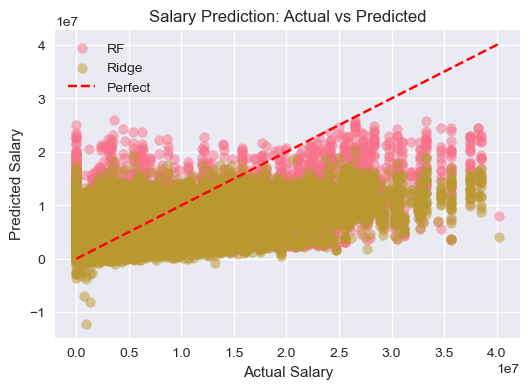

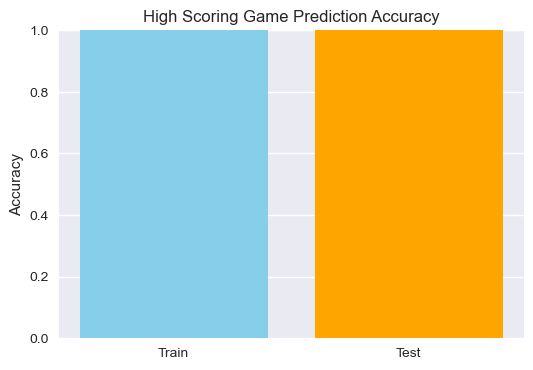

In [487]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-6))) * 100

print("Random Forest (Salary):")
print("MAE:", mean_absolute_error(y_test_sal, rf_pred))
print("RMSE:", mean_squared_error(y_test_sal, rf_pred, squared=False))
print("R²:", r2_score(y_test_sal, rf_pred))
print("MAPE:", mape(y_test_sal, rf_pred))

print("Ridge (Salary):")
print("MAE:", mean_absolute_error(y_test_sal, ridge_pred))
print("RMSE:", mean_squared_error(y_test_sal, ridge_pred, squared=False))
print("R²:", r2_score(y_test_sal, ridge_pred))
print("MAPE:", mape(y_test_sal, ridge_pred))

acc_train_hs = accuracy_score(y_train_hs, gb.predict(X_train_hs))
acc_test_hs  = accuracy_score(y_test_hs, gb_pred)
print("Gradient Boosting (High Score) Accuracy:")
print("Train:", acc_train_hs, "Test:", acc_test_hs)


plt.figure(figsize=(6,4))
plt.scatter(y_test_sal, rf_pred, alpha=0.5, label="RF")
plt.scatter(y_test_sal, ridge_pred, alpha=0.5, label="Ridge")
plt.plot([y_test_sal.min(), y_test_sal.max()], [y_test_sal.min(), y_test_sal.max()], "r--", label="Perfect")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary Prediction: Actual vs Predicted")
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Train", "Test"], [acc_train_hs, acc_test_hs], color=["skyblue","orange"])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("High Scoring Game Prediction Accuracy")
plt.show()


In [496]:
full_data.dtypes

game_id                    int64
teamName                  object
playerName                object
FG                         int64
FGA                        int64
3P                         int64
3PA                        int64
FT                         int64
FTA                        int64
ORB                        int64
DRB                        int64
TRB                        int64
AST                        int64
STL                        int64
BLK                        int64
TOV                        int64
PF                         int64
PTS                        int64
isStarter                  int64
seasonStartYear            int64
awayTeam                  object
pointsAway                 int64
homeTeam                  object
pointsHome                 int64
isRegular                  int64
salary($)                float64
inflationAdjSalary($)    float64
MP_mins                  float64
MP_secs                  float64
game_margin                int64
is_clutch 

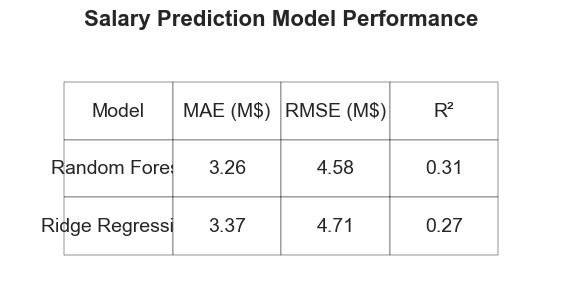

In [489]:
models = ["Random Forest", "Ridge Regression"]
mae = [3.26, 3.37]
rmse = [4.58, 4.71]
r2 = [0.31, 0.27]

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')

table_data = []
for i in range(len(models)):
    table_data.append([models[i], mae[i], rmse[i], r2[i]])

the_table = ax.table(cellText=table_data,
                     colLabels=["Model", "MAE (M$)", "RMSE (M$)", "R²"],
                     cellLoc='center', loc='center')

the_table.auto_set_font_size(False)
the_table.set_fontsize(14)

for key, cell in the_table.get_celld().items():
    cell.set_height(0.25)     
    cell.set_width(0.2)      
    cell.set_edgecolor('black')

plt.title("Salary Prediction Model Performance", fontsize=16, fontweight='bold', pad=20)
plt.show()


In [65]:
MLNBA = full_data.copy()

MLNBA = MLNBA.sort_values(by=['playerName', 'game_id'])

rolling_features = ['3PA', '3P', 'FGA', 'FG', 'PTS', 'AST', 'TRB', 'MP_mins']

for feature in rolling_features:
    MLNBA[f'{feature}_rolling3'] = MLNBA.groupby('playerName')[feature].transform(lambda x: x.shift(1).rolling(window=3).mean())

KeyError: 'Column not found: MP_mins'

In [ ]:
features = [f'{f}_rolling3' for f in rolling_features]
target = '3P'  
X = MLNBA[features]
y = MLNBA[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 score:", r2_score(y_test, y_pred))

In [ ]:
lower_bound = MLNBA['3P'].quantile(0.01)
upper_bound = MLNBA['3P'].quantile(0.99)

MLNBA_clean = MLNBA[(MLNBA['3P'] >= lower_bound) & (MLNBA['3P'] <= upper_bound)]

In [182]:
MLNBA.isnull().sum()

game_id                     0
teamName                    0
playerName                  0
FG                          0
FGA                         0
3P                          0
3PA                         0
FT                          0
FTA                         0
ORB                         0
DRB                         0
TRB                         0
AST                         0
STL                         0
BLK                         0
TOV                         0
PF                          0
PTS                         0
isStarter                   0
seasonStartYear             0
awayTeam                    0
pointsAway                  0
homeTeam                    0
pointsHome                  0
isRegular                   0
salary($)                   0
inflationAdjSalary($)       0
MP_mins                     0
MP_secs                     0
3PA_rolling3             6731
3P_rolling3              6731
FGA_rolling3             6731
FG_rolling3              6731
PTS_rollin

In [184]:
MLNBA.dropna(inplace=True)


In [186]:
MLNBA.isnull().sum()

game_id                  0
teamName                 0
playerName               0
FG                       0
FGA                      0
3P                       0
3PA                      0
FT                       0
FTA                      0
ORB                      0
DRB                      0
TRB                      0
AST                      0
STL                      0
BLK                      0
TOV                      0
PF                       0
PTS                      0
isStarter                0
seasonStartYear          0
awayTeam                 0
pointsAway               0
homeTeam                 0
pointsHome               0
isRegular                0
salary($)                0
inflationAdjSalary($)    0
MP_mins                  0
MP_secs                  0
3PA_rolling3             0
3P_rolling3              0
FGA_rolling3             0
FG_rolling3              0
PTS_rolling3             0
AST_rolling3             0
TRB_rolling3             0
MP_mins_rolling3         0
d

In [190]:

X = MLNBA[features]
y = MLNBA[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 score:", r2_score(y_test, y_pred))

RMSE: 0.9044026866282802
R2 score: 0.30411247018157195


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [194]:
from sklearn.metrics import r2_score

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)


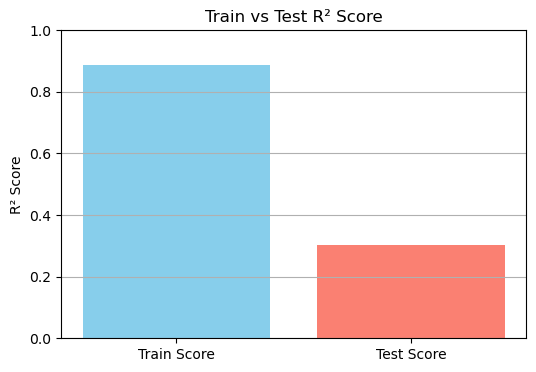

In [196]:

scores = [train_score, test_score]
labels = ['Train Score', 'Test Score']

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.title('Train vs Test R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)  # Adjust based on your values
plt.grid(True, axis='y')
plt.show()


In [200]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))


RMSE: 0.87703725155825
R²: 0.34558771022366896


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


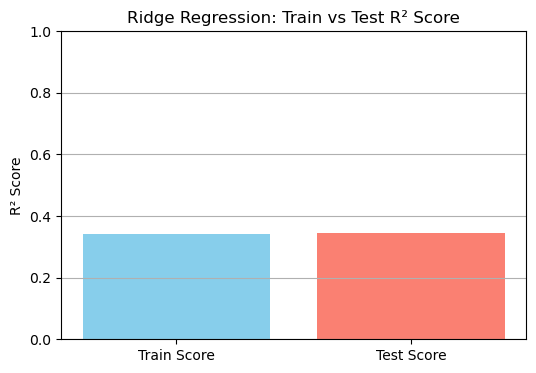

In [202]:
train_pred = ridge.predict(X_train)
test_pred = ridge.predict(X_test)

# R² Scores
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

# Bar Chart
scores = [train_score, test_score]
labels = ['Train Score', 'Test Score']

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=['skyblue', 'salmon'])
plt.title('Ridge Regression: Train vs Test R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.show()


In [207]:
MLNBA_AST = full_data.copy()

MLNBA_AST = MLNBA_AST.sort_values(['playerName', 'game_id'])


In [211]:
rolling_features = ['3P', 'FGA', 'PTS', 'MP_mins', 'MP_secs', 'TOV']  # example features for assist prediction
for feature in rolling_features:
    MLNBA_AST[f'{feature}_rolling3'] = MLNBA_AST.groupby('playerName')[feature].shift(1).rolling(window=3).mean()

In [213]:
MLNBA_AST = MLNBA_AST.dropna(subset=[f'{f}_rolling3' for f in rolling_features] + ['AST'])


In [215]:
features = [f'{f}_rolling3' for f in rolling_features]
target = 'AST'  

X = MLNBA_AST[features]
y = MLNBA_AST[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [217]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R2 score:", r2_score(y_test, y_pred))

RMSE: 1.9829664099457602
R2 score: 0.3348139009369251


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [89]:
full_data.columns

Index(['game_id', 'teamName', 'playerName', 'FG', 'FGA', '3P', '3PA', 'FT',
       'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'isStarter', 'seasonStartYear', 'awayTeam', 'pointsAway', 'homeTeam',
       'pointsHome', 'isRegular', 'salary($)', 'inflationAdjSalary($)',
       'MP_mins', 'MP_secs'],
      dtype='object')

In [91]:
import pandas as pd
import numpy as np

# Assuming your dataframe is called 'df'
# Convert minutes and seconds to total minutes
full_data['total_minutes'] = full_data['MP_mins'] + (full_data['MP_secs'] / 60)

# Remove players with 0 minutes to avoid division by zero
full_data = full_data[full_data['total_minutes'] > 0]

# ============================================
# EFFICIENCY METRICS (as mentioned in your text)
# ============================================

# True Shooting Percentage: TS% = PTS / (2 × (FGA + 0.44 × FTA))
full_data['TS_pct'] = full_data['PTS'] / (2 * (full_data['FGA'] + 0.44 * full_data['FTA']))
full_data['TS_pct'] = full_data['TS_pct'].replace([np.inf, -np.inf], 0).fillna(0)

# Effective Field Goal Percentage: eFG% = (FG + 0.5 × 3P) / FGA
full_data['eFG_pct'] = (full_data['FG'] + 0.5 * full_data['3P']) / full_data['FGA']
full_data['eFG_pct'] = full_data['eFG_pct'].replace([np.inf, -np.inf], 0).fillna(0)

# Assist-to-Turnover Ratio: AST/TOV
full_data['AST_TOV_ratio'] = full_data['AST'] / (full_data['TOV'] + 1)  # Add 1 to avoid division by zero

# ============================================
# RATE STATISTICS - Per-36 minute statistics
# ============================================
per_36_multiplier = 36 / (full_data['total_minutes'] + 0.1)  # Add small value to avoid division by zero

full_data['PTS_per_36'] = full_data['PTS'] * per_36_multiplier
full_data['AST_per_36'] = full_data['AST'] * per_36_multiplier
full_data['TRB_per_36'] = full_data['TRB'] * per_36_multiplier
full_data['STL_per_36'] = full_data['STL'] * per_36_multiplier
full_data['BLK_per_36'] = full_data['BLK'] * per_36_multiplier

# ============================================
# TEMPORAL FEATURES
# ============================================
# Career trajectory - years of experience
player_first_season = full_data.groupby('playerName')['seasonStartYear'].min().reset_index()
player_first_season.columns = ['playerName', 'first_season']
full_data = full_data.merge(player_first_season, on='playerName', how='left')
full_data['years_experience'] = full_data['seasonStartYear'] - full_data['first_season']

print("Feature engineering completed!")
print(f"New features created: TS_pct, eFG_pct, AST_TOV_ratio, per-36 stats, years_experience")
print(f"Dataset shape: {full_data.shape}")

Feature engineering completed!
New features created: TS_pct, eFG_pct, AST_TOV_ratio, per-36 stats, years_experience
Dataset shape: (621449, 40)
